# MSC Traffic

In [ ]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import tensorflow as tf
import os
from numpy import sqrt

from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
from google.colab import files
!ls

sample_data


In [ ]:
from google.colab import files
!rm 'msc_traffic_daily_1year_10nodes.csv'

In [ ]:
from google.colab import files
uploaded = files.upload()

Saving msc_traffic_daily_1year_10nodes.csv to msc_traffic_daily_1year_10nodes.csv


In [ ]:
#DATA LOADING
data = pd.read_csv("./msc_traffic_daily_1year_10nodes.csv")
data.drop("Unnamed: 1", axis=1, inplace=True)

In [ ]:
# Transpose
data = data.T

In [ ]:
# make first row as column headers and select all rows except the first
data.columns = data.iloc[0]
data = data[1:]
data = data.rename(columns=({"index":"Date"}))
data.index = pd.to_datetime(data.index)

In [ ]:
# column names
cols = [data.columns]

In [ ]:
# print head
data.head(5)

MSC_Id     NR_MSC_1 NR_MSC_2 NR_MSC_3  ... NR_MSC_8 NR_MSC_9 NR_MSC_10
2020-04-02   187.01  188.707  392.815  ...  242.923  105.998   195.443
2020-04-03  167.944  169.101  365.096  ...   213.32  169.104   165.118
2020-04-04  176.854  179.022  385.117  ...   230.25  188.099   182.257
2020-04-05  184.058  185.516  394.592  ...  244.058  201.026   196.785
2020-04-06  185.561    187.6  396.516  ...  252.098  210.269   203.757

[5 rows x 10 columns]

In [ ]:
# print tail
data.tail(5)

MSC_Id     NR_MSC_1 NR_MSC_2 NR_MSC_3  ... NR_MSC_8 NR_MSC_9 NR_MSC_10
2021-04-02  161.253  162.989  309.678  ...  202.999  194.302   153.917
2021-04-03  180.222  181.657  337.292  ...  227.654  228.045   179.374
2021-04-04  187.117  189.028  346.482  ...  241.455  246.853   192.928
2021-04-05  186.749  188.786  345.958  ...  241.824  248.553   193.073
2021-04-06  188.622  190.014  347.386  ...  243.856  250.718   194.612

[5 rows x 10 columns]

In [ ]:
data.shape

(370, 10)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 370 entries, 2020-04-02 to 2021-04-06
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   NR_MSC_1   367 non-null    object
 1   NR_MSC_2   367 non-null    object
 2   NR_MSC_3   367 non-null    object
 3   NR_MSC_4   367 non-null    object
 4   NR_MSC_5   367 non-null    object
 5   NR_MSC_6   367 non-null    object
 6   NR_MSC_7   367 non-null    object
 7   NR_MSC_8   368 non-null    object
 8   NR_MSC_9   368 non-null    object
 9   NR_MSC_10  365 non-null    object
dtypes: object(10)
memory usage: 31.8+ KB


In [ ]:
# imputation
print(data.isnull().sum())
data = data.fillna(method='bfill')
print(data.isnull().sum())

MSC_Id
NR_MSC_1     3
NR_MSC_2     3
NR_MSC_3     3
NR_MSC_4     3
NR_MSC_5     3
NR_MSC_6     3
NR_MSC_7     3
NR_MSC_8     2
NR_MSC_9     2
NR_MSC_10    5
dtype: int64
MSC_Id
NR_MSC_1     0
NR_MSC_2     0
NR_MSC_3     0
NR_MSC_4     0
NR_MSC_5     0
NR_MSC_6     0
NR_MSC_7     0
NR_MSC_8     0
NR_MSC_9     0
NR_MSC_10    0
dtype: int64


In [ ]:
# Describe the data
data.describe()

MSC_Id    NR_MSC_1    NR_MSC_2    NR_MSC_3  ...    NR_MSC_8    NR_MSC_9   NR_MSC_10
count   370.000000  370.000000  370.000000  ...  370.000000  370.000000  370.000000
mean    176.033454  181.864008  361.171105  ...  230.208000  195.749962  178.277389
std      27.148008   15.473796   38.954597  ...   20.918206   32.258239   28.002140
min      21.817000  146.873000  295.061000  ...  183.206000   34.260000   14.180000
25%     171.264250  174.242750  338.691750  ...  220.920500  175.536000  167.983750
50%     180.057000  182.185000  349.150500  ...  230.830000  193.995500  181.218000
75%     187.090250  189.209500  390.338500  ...  241.375000  218.437000  191.453750
max     345.856000  346.599000  707.257000  ...  360.177000  310.169000  311.070000

[8 rows x 10 columns]

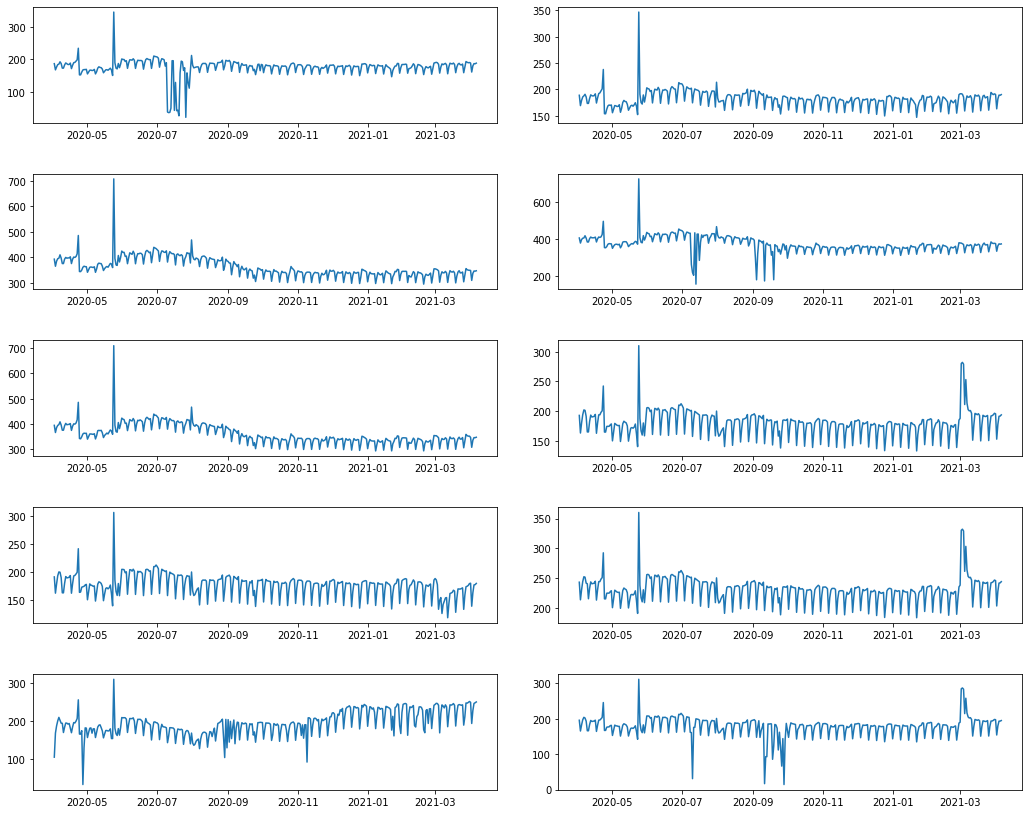

In [ ]:
fig, ax = plt.subplots(5, 2, figsize=(15, 12))
fig.tight_layout(pad=3)
ax[0, 0].plot(data.index, data['NR_MSC_1'])
ax[0, 1].plot(data.index, data['NR_MSC_2'])
ax[1, 0].plot(data.index, data['NR_MSC_3'])
ax[1, 1].plot(data.index, data['NR_MSC_4'])
ax[2, 0].plot(data.index, data['NR_MSC_5'])
ax[2, 1].plot(data.index, data['NR_MSC_6'])
ax[3, 0].plot(data.index, data['NR_MSC_7'])
ax[3, 1].plot(data.index, data['NR_MSC_8'])
ax[4, 0].plot(data.index, data['NR_MSC_9'])
ax[4, 1].plot(data.index, data['NR_MSC_10'])

In [ ]:
from plotly.subplots import make_subplots
import plotly.graph_objects as go

# Initialize figure with subplots
fig = make_subplots(
    rows=5, cols=2, subplot_titles=("NR_MSC_1", "NR_MSC_2", "NR_MSC_3", "NR_MSC_4", "NR_MSC_5", "NR_MSC_6", "NR_MSC_7", "NR_MSC_8", "NR_MSC_9", "NR_MSC_10")
)

# Add traces
fig.add_trace(go.Scatter(x=data.index, y=data['NR_MSC_1'], name = "NR_MSC_1"), row=1, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['NR_MSC_2'], name = "NR_MSC_2"), row=1, col=2)
fig.add_trace(go.Scatter(x=data.index, y=data['NR_MSC_3'], name = "NR_MSC_3"), row=2, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['NR_MSC_4'], name = "NR_MSC_4"), row=2, col=2)
fig.add_trace(go.Scatter(x=data.index, y=data['NR_MSC_5'], name = "NR_MSC_5"), row=3, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['NR_MSC_6'], name = "NR_MSC_6"), row=3, col=2)
fig.add_trace(go.Scatter(x=data.index, y=data['NR_MSC_7'], name = "NR_MSC_7"), row=4, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['NR_MSC_8'], name = "NR_MSC_8"), row=4, col=2)
fig.add_trace(go.Scatter(x=data.index, y=data['NR_MSC_9'], name = "NR_MSC_9"), row=5, col=1)
fig.add_trace(go.Scatter(x=data.index, y=data['NR_MSC_10'], name = "NR_MSC_10"), row=5, col=2)

fig.update_layout(title_text="MSC Traffic", height=1500)

fig.show()

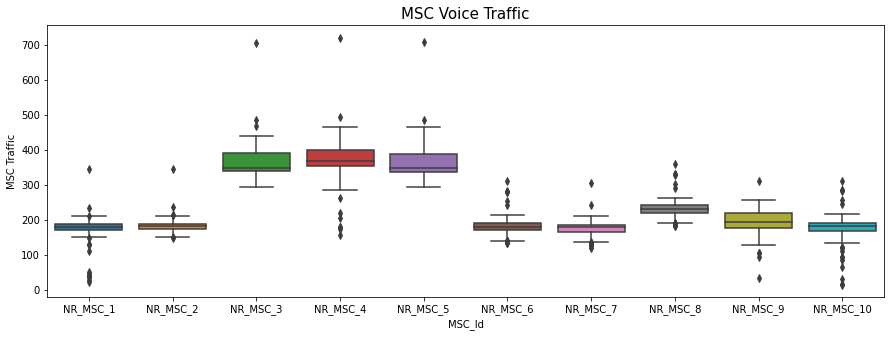

In [ ]:
#drawing figure with title and single axis. Size and resolution are specified
plt.figure(figsize=(15,5));
plt.title('MSC Voice Traffic',fontsize=15);

#setting y axis label
plt.ylabel('MSC Traffic');

#rotating x axis ticks by 90 degrees
plt.xticks(rotation=0);

#drawing boxplot for
sns.boxplot(data=data);

In [ ]:
#fig = px.box(data, x=data['NR_MSC_1'], y=data.index)
#fig.show()

import plotly.graph_objects as go

fig = go.Figure()

for col in data:
  fig.add_trace(go.Box(y=data[col].values, name=data[col].name))

fig.update_layout(title_text="MSC Traffic", height=700)
                    
fig.show()

In [ ]:
def plot_train_test_pred(train, test, predicted):
    fig = plt.figure(figsize=(15, 4))
    fig.suptitle("Train, Test, and Forecast plots")
    past, = plt.plot(train.index, train, 'r.-', label="Train")
    future, = plt.plot(test.index[-70:], test[-70:], color ='blue', label="Test")
    #predicted_future, = plt.plot(test.index[-70:], predicted[-70:], 'g.-', label="Predicted")
    predicted_future, = plt.plot(test.index[370:], predicted[370:], 'g.-', label="Predicted")
    #forecast, = plt.plot(test.index[85:], predicted[85:0], 'b.-', label="Forecast")
    plt.legend()
    plt.show()

In [ ]:
#Plotting Functions
def plot_train_test_pred(train, test, predicted):
    fig = plt.figure(figsize=(15, 4))
    fig.suptitle("Train, Test, and Forecast plots")
    past, = plt.plot(train.index, train, 'r.-', label="Train")
    future, = plt.plot(test.index[-70:], test[-70:], color ='blue', label="Test")
    predicted_future, = plt.plot(test.index[-70:], predicted[-70:], 'g.-', label="Predicted")
    plt.legend()
    plt.show()
    
def plot_forecasts(df):
    fig, axs = plt.subplots(5, 2, figsize=(20, 20), sharex=False)
    axx = axs.ravel()
    for i in range(0, 10):
        df[df.columns[i]].loc[str(df.iloc[[0]].index[0]).split(' ')[0] : str(df.iloc[[len(df)-1]].index[0]).split(' ')[0]].plot(ax=axx[i])
        
        axx[i].set_xlabel("date")
        axx[i].set_ylabel(df.columns[i])  


#### HOLT-WINTER EXPONENTIAL SMOOTHING

In [ ]:
from matplotlib import pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import SimpleExpSmoothing

from statsmodels.tsa.holtwinters import ExponentialSmoothing as HWES

In [ ]:
def train_test_split(data, n_test):
    return data[:-n_test], data[n_test:]

In [ ]:
l = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]

In [ ]:
tr, te  = train_test_split(l, 3)
tr, te

([1, 2, 3, 4, 5, 6, 7], [4, 5, 6, 7, 8, 9, 10])

In [ ]:
te[-4:]

[7, 8, 9, 10]

In [ ]:
def measure_rmse(actual, predicted):
    return sqrt(mean_absolute_error(actual, predicted))

In [ ]:
def exp_smoothing_forecast(history):
    #t, d, s, p, b, r = config
    history = np.array(history)
    model = HWES(history, seasonal='add', seasonal_periods=30)
    model_fit = model.fit(optimized=True)
    yhat = model_fit.predict(len(history), len(history))
    return yhat[0], model_fit

In [ ]:
def walk_forward_validation(data, n_test, data_mode):
    forecast_15days, forecast_1Month, forecast_3Months = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    for i in data.columns:
#         warnings.resetwarnings()
#         warnings.filterwarnings('ignore')
        print("Fitting ", i)
        curr_data = data[i]
        predictions = list()
        train, test = train_test_split(curr_data, n_test)
        history = [x for x in train]
        for k in range(len(test)):
            yhat, model = exp_smoothing_forecast(history)
            predictions.append(yhat)
            history.append(test[k])
            
            
        
        mae = mean_absolute_error(test, predictions)
        mape = mean_absolute_percentage_error(test, predictions)
        mse = mean_squared_error(test, predictions)
        rmse = np.sqrt(mse)
        print("MAE  : ", mae)
        print("MAPE : ", mape)
        print("MSE  : ", mse)
        print("RMSE : ", rmse)
        
        plot_train_test_pred(train, test, predictions)
        
        # Forecast
       
        forecast_15days[i] = model.forecast((15+70))
        forecast_1Month[i] = model.forecast((30+70))
        forecast_3Months[i] = model.forecast((90+70))

        print("======================================")
        
    forecast_15days = forecast_15days.iloc[70:]
    forecast_1Month = forecast_1Month.iloc[70:]
    forecast_3Months = forecast_3Months.iloc[70:]
        
    forecast_15days["Date"] = pd.date_range(start= '2021-04-07', periods=15, freq='1D')
    forecast_15days = forecast_15days.set_index("Date")
    forecast_1Month["Date"] = pd.date_range(start= '2021-04-07', periods=30, freq='1D')
    forecast_1Month = forecast_1Month.set_index("Date")
    forecast_3Months["Date"] = pd.date_range(start= '2021-04-07', periods=90, freq='1D')
    forecast_3Months = forecast_3Months.set_index("Date")
            
    return forecast_15days, forecast_1Month, forecast_3Months

## Fitting daily data

Fitting  NR_MSC_1
MAE  :  14.394296950514333
MAPE :  0.14132440257092427
MSE  :  661.9837559734142
RMSE :  25.729044987589692


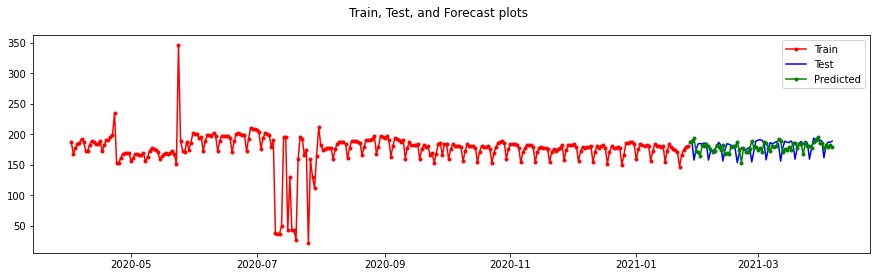

Fitting  NR_MSC_2
MAE  :  8.780797910258944
MAPE :  0.04986254996256418
MSE  :  135.9652249596237
RMSE :  11.660412726813048


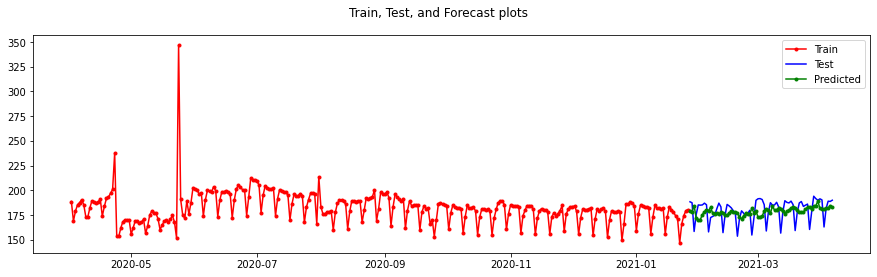

Fitting  NR_MSC_3
MAE  :  14.128715873636944
MAPE :  0.04048180852172159
MSE  :  391.8268788215728
RMSE :  19.79461742043965


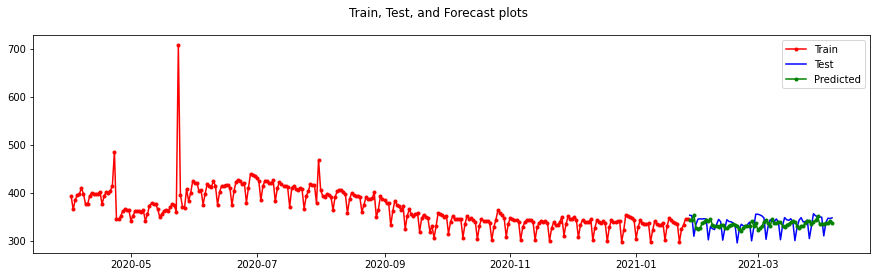

Fitting  NR_MSC_4
MAE  :  23.650501270504357
MAPE :  0.07465478556965001
MSE  :  1499.11571268693
RMSE :  38.71841567893669


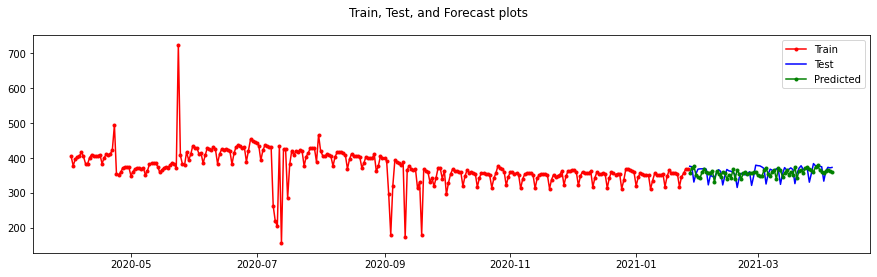

Fitting  NR_MSC_5


/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/holtwinters.py:712: ConvergenceWarning:

Optimization failed to converge. Check mle_retvals.



MAE  :  14.376830201805303
MAPE :  0.041390958500467354
MSE  :  405.1874290320124
RMSE :  20.129267970594768


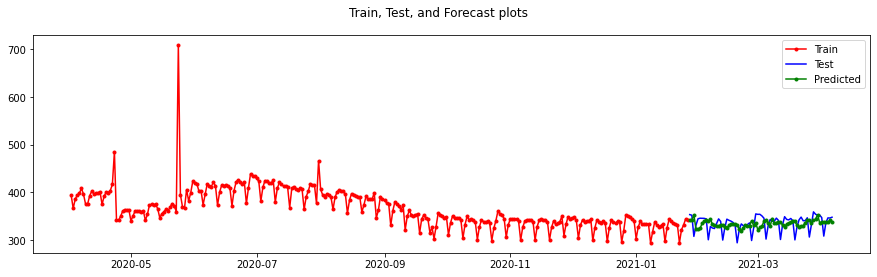

Fitting  NR_MSC_6
MAE  :  13.868768190031266
MAPE :  0.08056016594380062
MSE  :  399.0857928359627
RMSE :  19.977131746974155


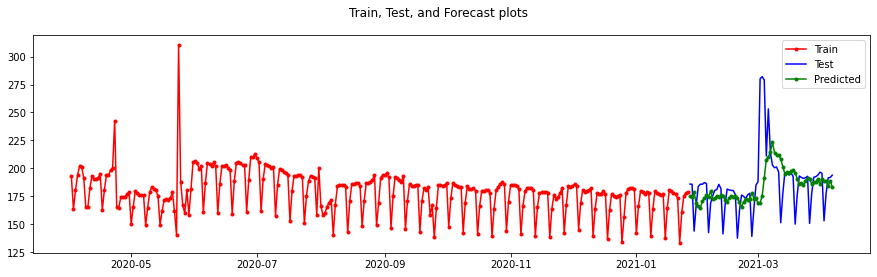

Fitting  NR_MSC_7
MAE  :  13.473299214766097
MAPE :  0.08248708557127567
MSE  :  297.8016742768509
RMSE :  17.25693119522851


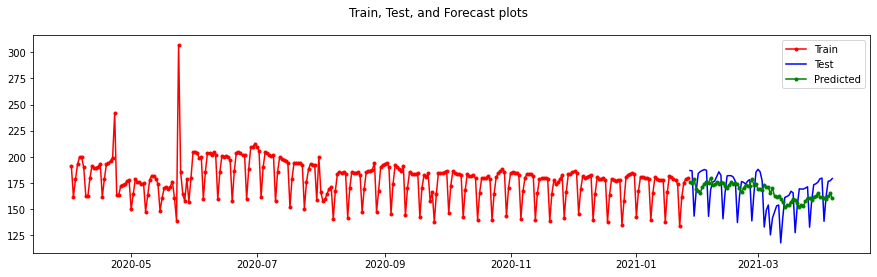

Fitting  NR_MSC_8
MAE  :  13.86835783907562
MAPE :  0.06208321578364088
MSE  :  398.6575645337481
RMSE :  19.966410907665605


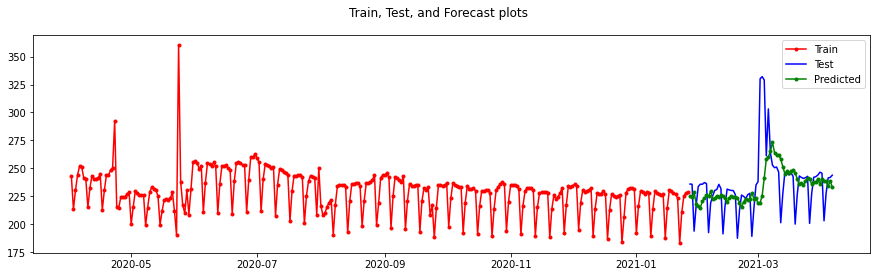

Fitting  NR_MSC_9
MAE  :  18.586304067365838
MAPE :  0.10150502048274386
MSE  :  550.9096081699605
RMSE :  23.471463698925138


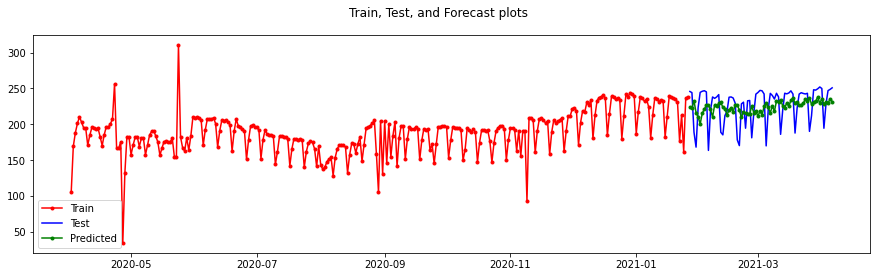

Fitting  NR_MSC_10
MAE  :  18.463845492113244
MAPE :  0.18282969336751362
MSE  :  785.5720620462093
RMSE :  28.028058478000386


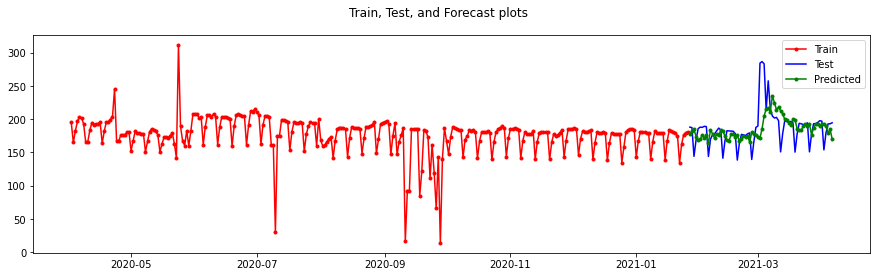

In [ ]:
f15d, f1m, f3m = walk_forward_validation(data, 70, "Days")

In [ ]:
f15d.shape, f1m.shape, f3m.shape

((15, 10), (30, 10), (90, 10))

In [ ]:
f15d.head()

NR_MSC_1    NR_MSC_2  ...    NR_MSC_9   NR_MSC_10
Date                                ...                        
2021-04-07  173.324939  184.661705  ...  239.424792  178.827761
2021-04-08  179.299044  185.028512  ...  240.511111  186.809660
2021-04-09  178.357200  182.757911  ...  230.474871  184.632301
2021-04-10  179.704034  183.427084  ...  238.920601  180.745983
2021-04-11  185.673447  182.112950  ...  236.722286  181.127639

[5 rows x 10 columns]

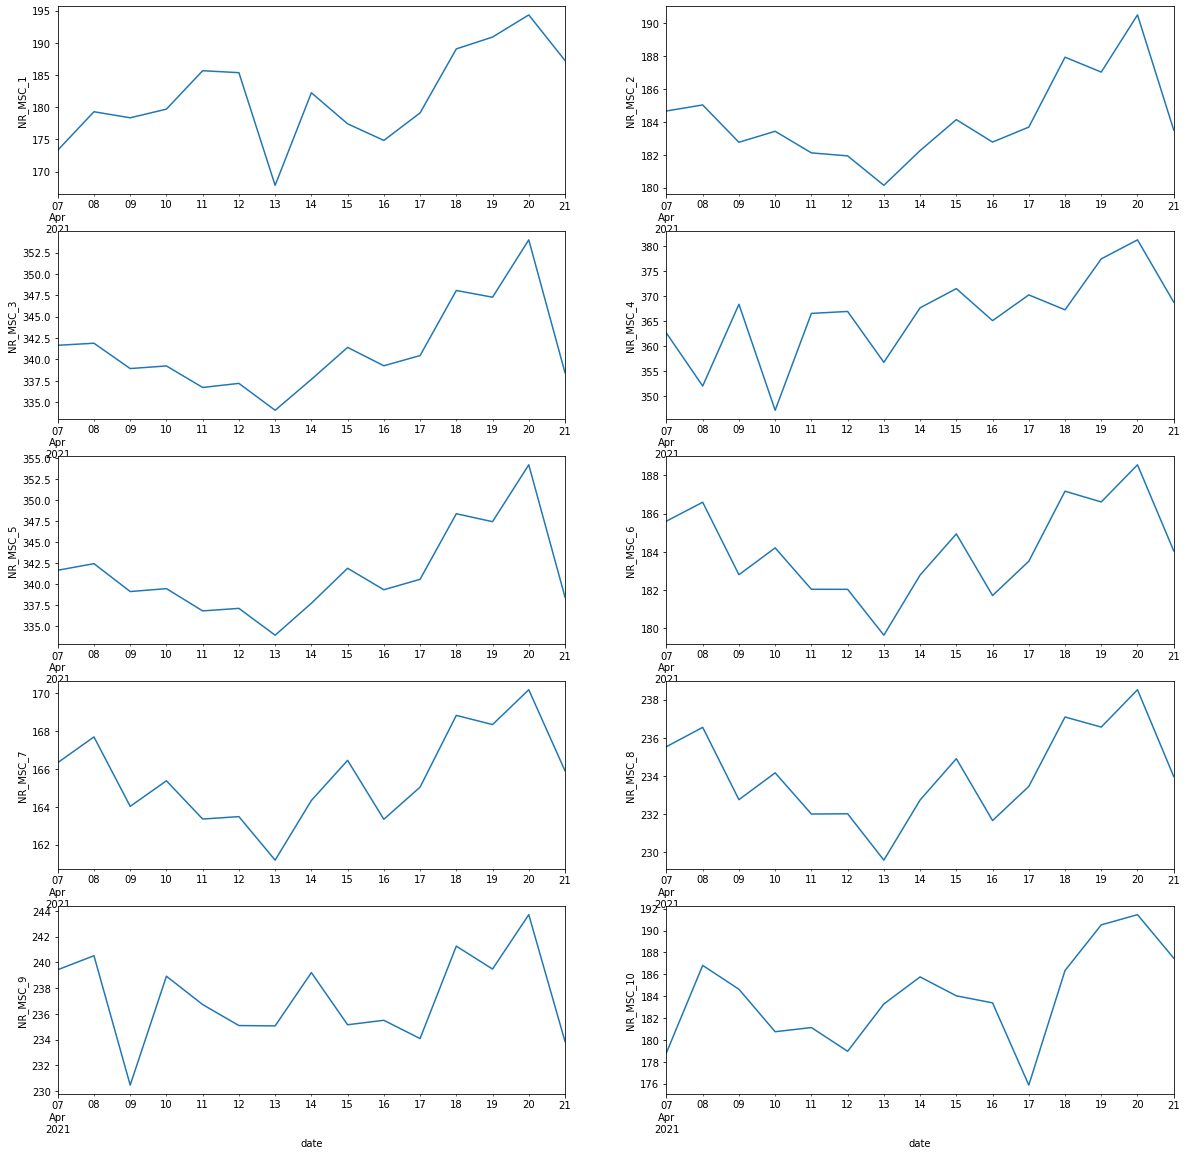

In [ ]:
plot_forecasts(f15d)

In [ ]:
f1m.head()

NR_MSC_1    NR_MSC_2  ...    NR_MSC_9   NR_MSC_10
Date                                ...                        
2021-04-07  173.324939  184.661705  ...  239.424792  178.827761
2021-04-08  179.299044  185.028512  ...  240.511111  186.809660
2021-04-09  178.357200  182.757911  ...  230.474871  184.632301
2021-04-10  179.704034  183.427084  ...  238.920601  180.745983
2021-04-11  185.673447  182.112950  ...  236.722286  181.127639

[5 rows x 10 columns]

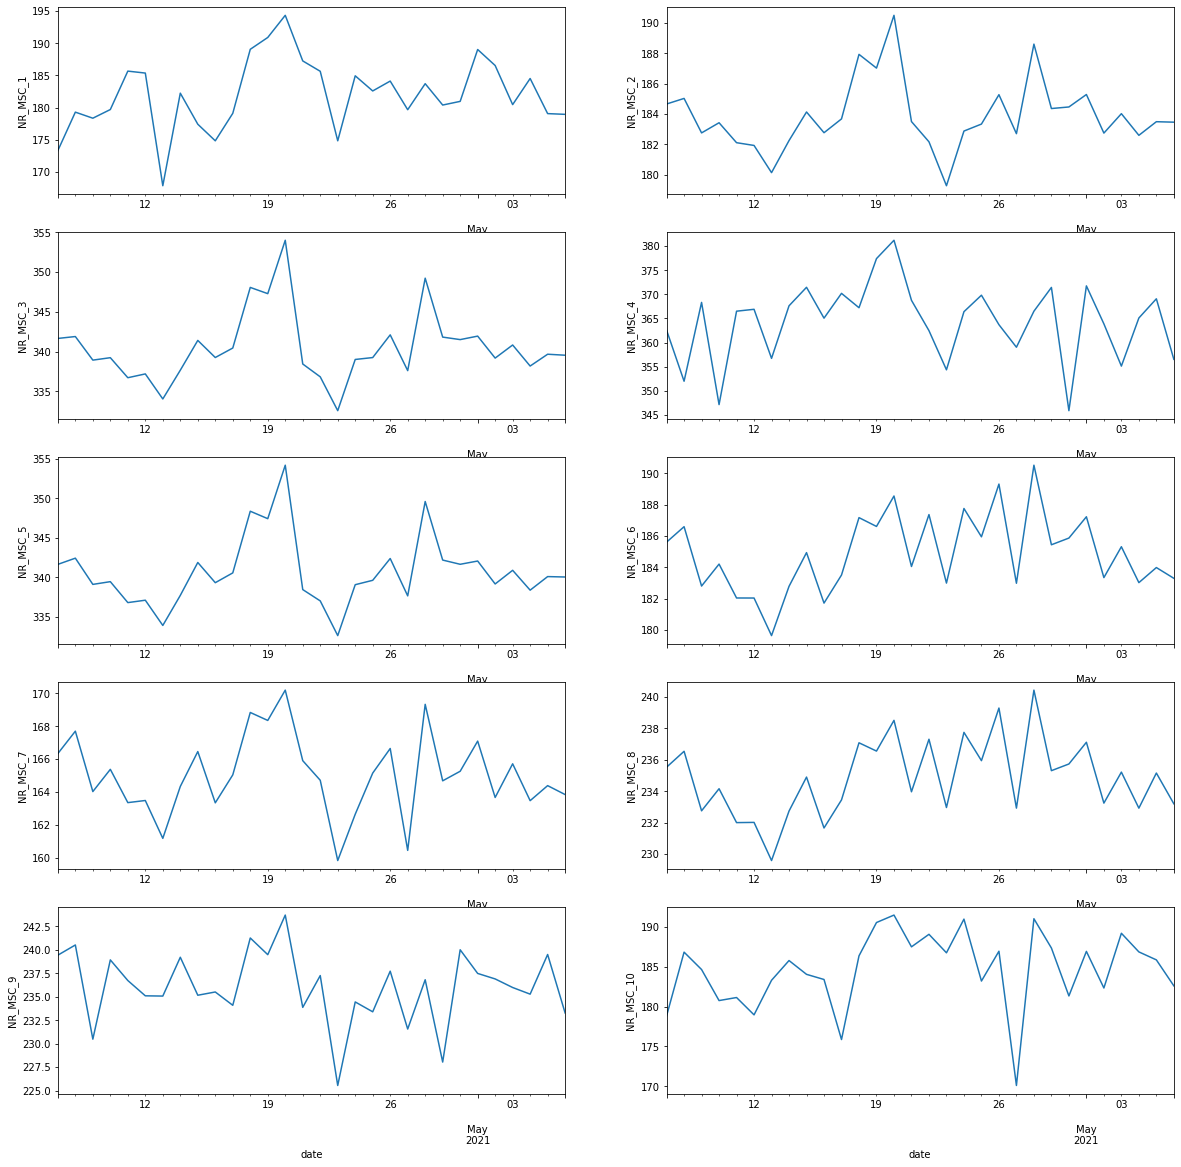

In [ ]:
plot_forecasts(f1m)

In [ ]:
f3m.head()

NR_MSC_1    NR_MSC_2  ...    NR_MSC_9   NR_MSC_10
Date                                ...                        
2021-04-07  173.324939  184.661705  ...  239.424792  178.827761
2021-04-08  179.299044  185.028512  ...  240.511111  186.809660
2021-04-09  178.357200  182.757911  ...  230.474871  184.632301
2021-04-10  179.704034  183.427084  ...  238.920601  180.745983
2021-04-11  185.673447  182.112950  ...  236.722286  181.127639

[5 rows x 10 columns]

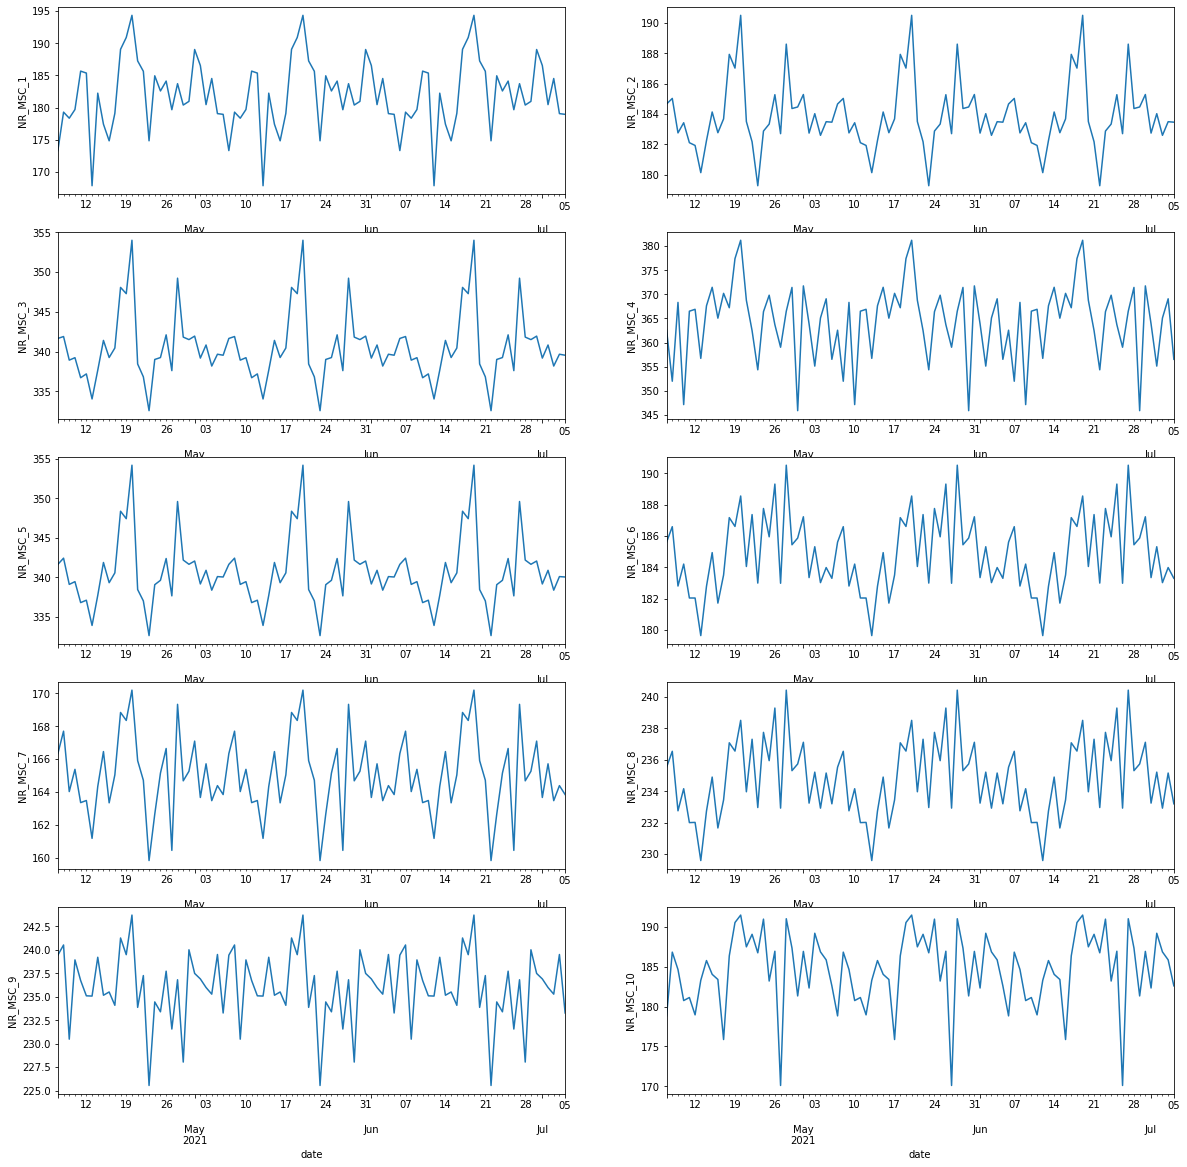

In [ ]:
plot_forecasts(f3m)

### SARIMA

In [ ]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [ ]:
def train_test_split(data, n_test):
    return data[:-n_test], data[n_test:]

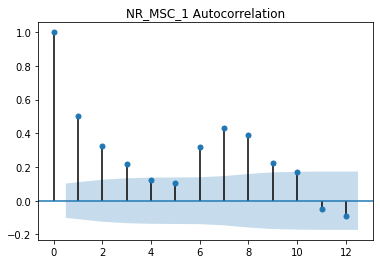

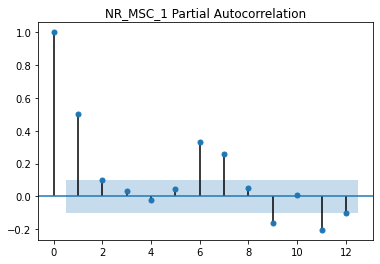

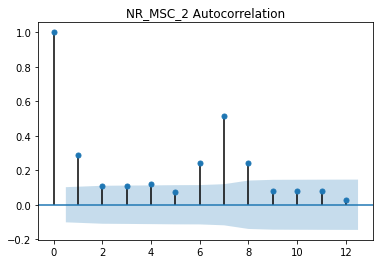

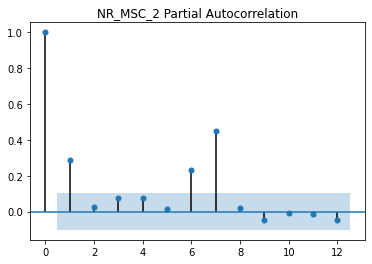

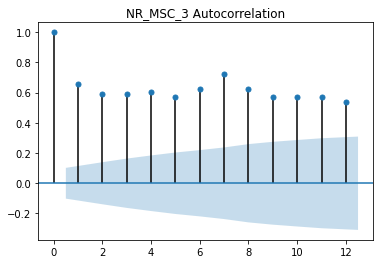

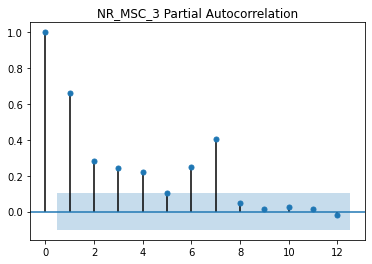

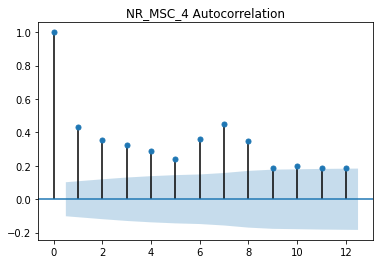

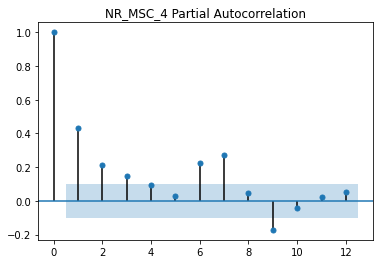

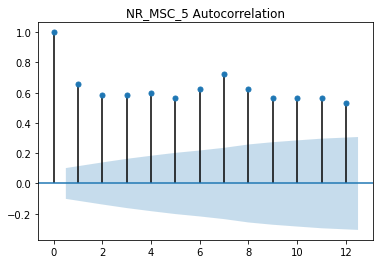

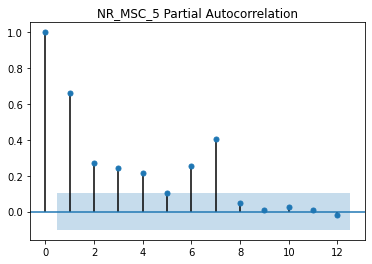

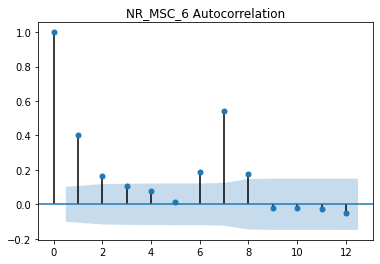

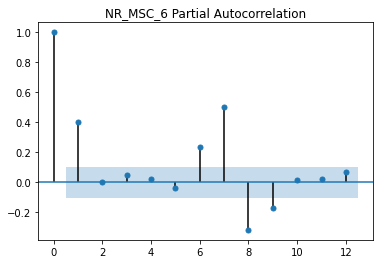

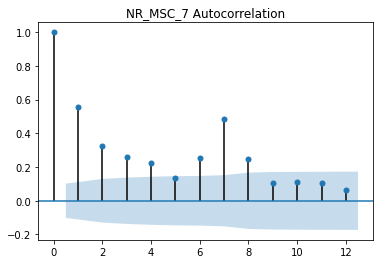

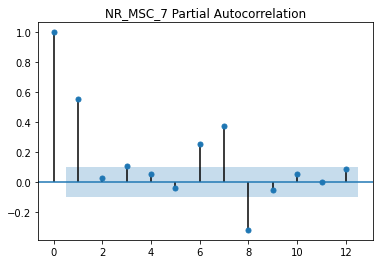

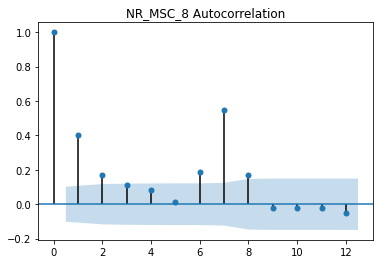

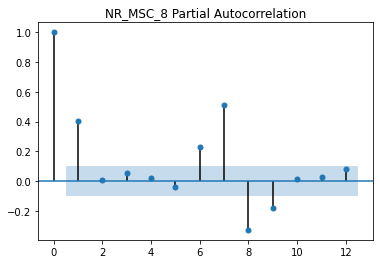

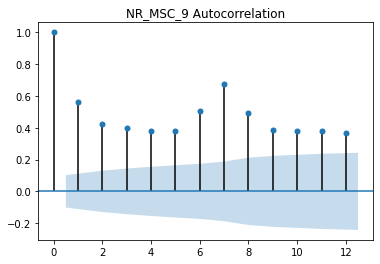

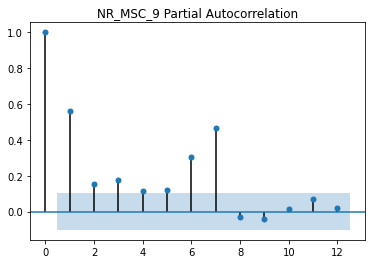

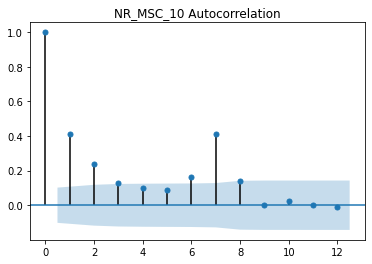

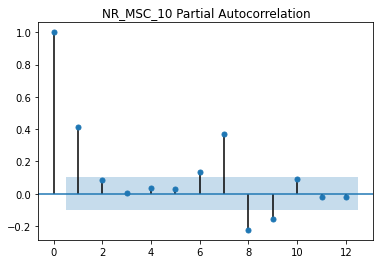

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
for i in data.columns:
    #print(i)
    plot_acf(data[i], lags=12, title=i + " Autocorrelation"), plot_pacf(data[i], lags=12, title= i + " Partial Autocorrelation")
    plt.show()

In [ ]:
def measure_rmse(actual, predicted):
    return sqrt(mean_absolute_error(actual, predicted))

In [ ]:
def sarima_forecast(history):
    history = np.array(history)
    model = SARIMAX(history, seasonal_order=(1, 1, 1, 7))
    model_fit = model.fit(optimized=True)
    yhat = model_fit.predict(len(history), len(history))
    #print("yhat", yhat)
    return yhat[0], model_fit

In [ ]:
def plot(train, test, predicted):
    fig = plt.figure(figsize=(15, 4))
    fig.suptitle("Train, Test, and Forecast plots")
    past, = plt.plot(train.index, train, 'r.-', label="Train")
    future, = plt.plot(test.index[-70:], test[-70:], color ='blue', label="Test")
    predicted_future, = plt.plot(test.index[-70:], predicted[-70:], 'g.-', label="Predicted")
    plt.legend()
    plt.show()

In [ ]:
data.columns

Index(['NR_MSC_1', 'NR_MSC_2', 'NR_MSC_3', 'NR_MSC_4', 'NR_MSC_5', 'NR_MSC_6',
       'NR_MSC_7', 'NR_MSC_8', 'NR_MSC_9', 'NR_MSC_10'],
      dtype='object', name='MSC_Id')

In [ ]:
def walk_forward_validation(data, n_test):
    forecast_15days, forecast_1Month, forecast_3Months = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    for i in data.columns:
        print("Fitting ", i)
        curr_data = data[i]
        predictions = list()
        train, test = train_test_split(curr_data, n_test)
        history = [x for x in train]
        for k in range(len(test)):
            yhat, model = sarima_forecast(history)
            predictions.append(yhat)
            history.append(test[k])
        
        mae = mean_absolute_error(test, predictions)
        mape = mean_absolute_percentage_error(test, predictions)
        mse = mean_squared_error(test, predictions)
        rmse = np.sqrt(mse)
        print("MAE  : ", mae)
        print("MAPE : ", mape)
        print("MSE  : ", mse)
        print("RMSE : ", rmse)
        
        # Forecast
       
        forecast_15days[i] = model.forecast((15+70))
        forecast_1Month[i] = model.forecast((30+70))
        forecast_3Months[i] = model.forecast((90+70))
        print("======================================")
        
    forecast_15days = forecast_15days.iloc[70:]
    forecast_1Month = forecast_1Month.iloc[70:]
    forecast_3Months = forecast_3Months.iloc[70:]
        
    forecast_15days["Date"] = pd.date_range(start= '2021-04-07', periods=15, freq='1D')
    forecast_15days = forecast_15days.set_index("Date")
    forecast_1Month["Date"] = pd.date_range(start= '2021-04-07', periods=30, freq='1D')
    forecast_1Month = forecast_1Month.set_index("Date")
    forecast_3Months["Date"] = pd.date_range(start= '2021-04-07', periods=90, freq='1D')
    forecast_3Months = forecast_3Months.set_index("Date")
            
    return forecast_15days, forecast_1Month, forecast_3Months

## Fitting daily data

Fitting  NR_MSC_1
MAE  :  11.043044057323765
MAPE :  0.13035814594619127
MSE  :  489.44776647452306
RMSE :  22.12346642085103


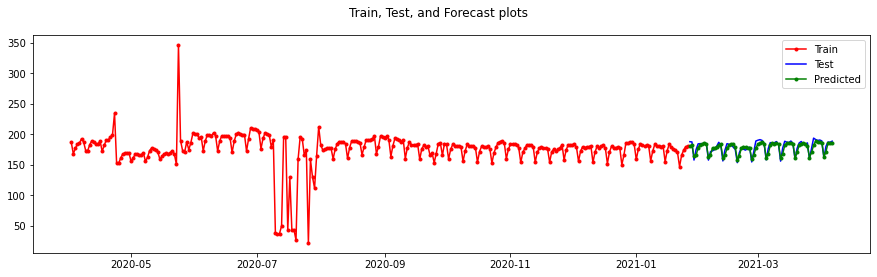

Fitting  NR_MSC_2
MAE  :  4.923464739499068
MAPE :  0.026898837466613815
MSE  :  56.68965031184216
RMSE :  7.529252971699261


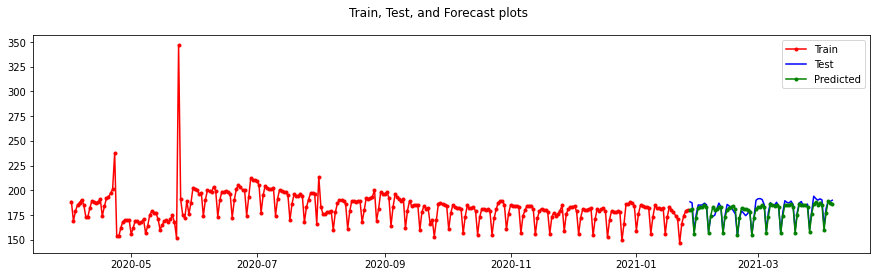

Fitting  NR_MSC_3
MAE  :  8.930230443876702
MAPE :  0.02379580460095221
MSE  :  254.73955125872143
RMSE :  15.960562372884027


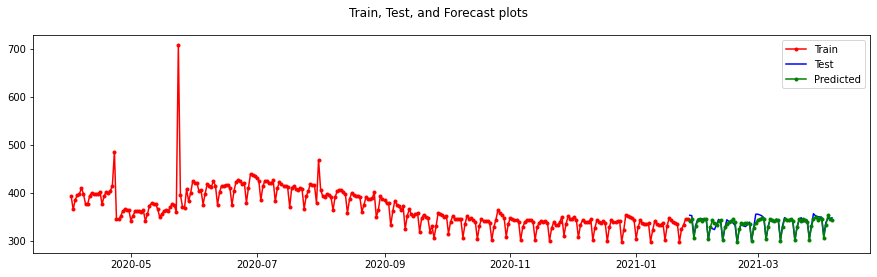

Fitting  NR_MSC_4
MAE  :  18.16125276265844
MAPE :  0.058072760098454336
MSE  :  1255.787040793833
RMSE :  35.437085670153984


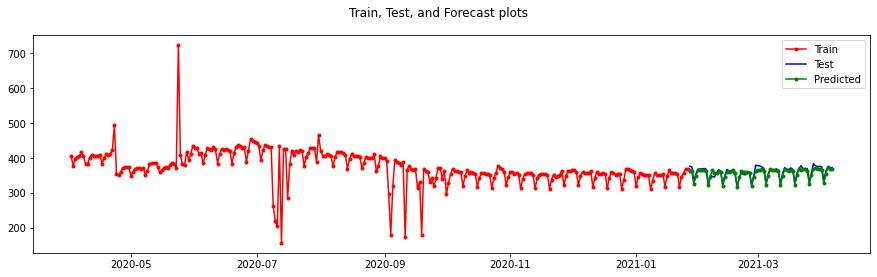

Fitting  NR_MSC_5
MAE  :  8.896930355464443
MAPE :  0.023767740482783545
MSE  :  258.81313387730535
RMSE :  16.0876702439261


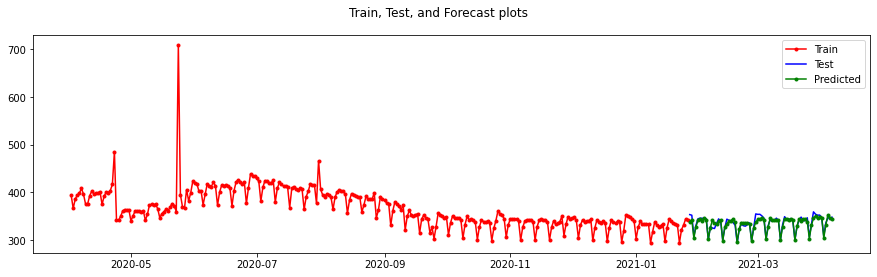

Fitting  NR_MSC_6
MAE  :  6.313988981528535
MAPE :  0.03368334613773493
MSE  :  157.7191389515529
RMSE :  12.558628068047597


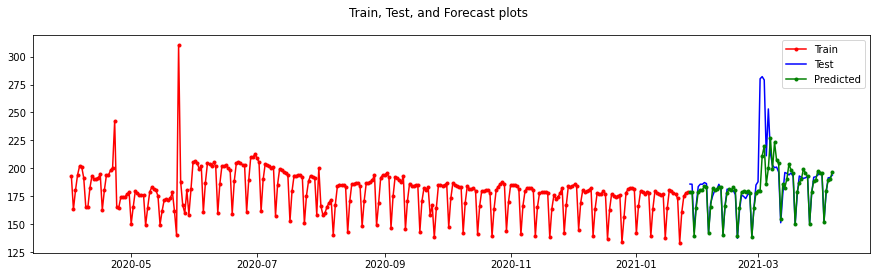

Fitting  NR_MSC_7
MAE  :  7.033616032377636
MAPE :  0.6033988070536538
MSE  :  284.398048486256
RMSE :  16.864105327181043


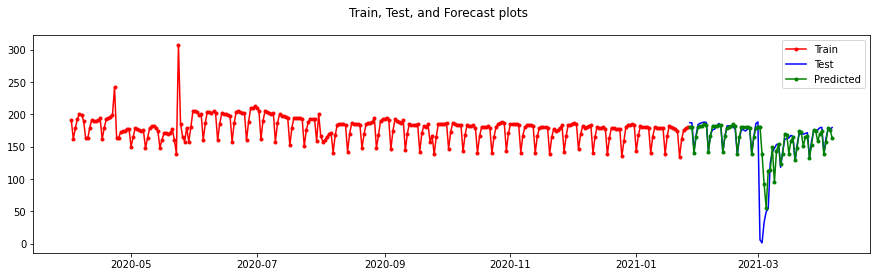

Fitting  NR_MSC_8
MAE  :  6.2705911454889565
MAPE :  0.026256421019615516
MSE  :  156.3865368289692
RMSE :  12.505460280572212


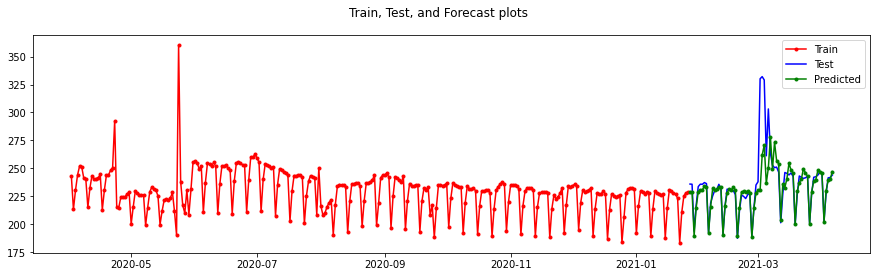

Fitting  NR_MSC_9
MAE  :  12.244392633549822
MAPE :  0.06814500992712841
MSE  :  321.61080251513744
RMSE :  17.93351060208618


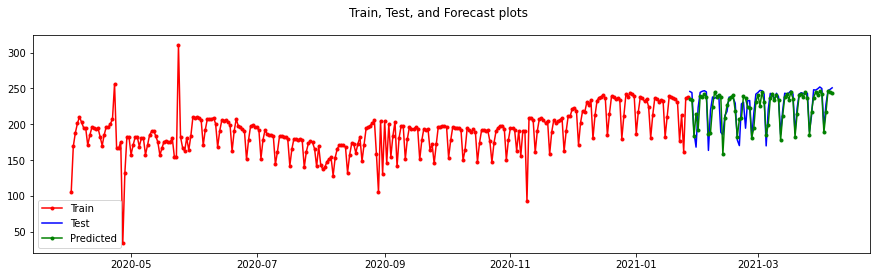

Fitting  NR_MSC_10
MAE  :  10.376186924345536
MAPE :  0.13266694524151462
MSE  :  489.69051757396926
RMSE :  22.128952021593097


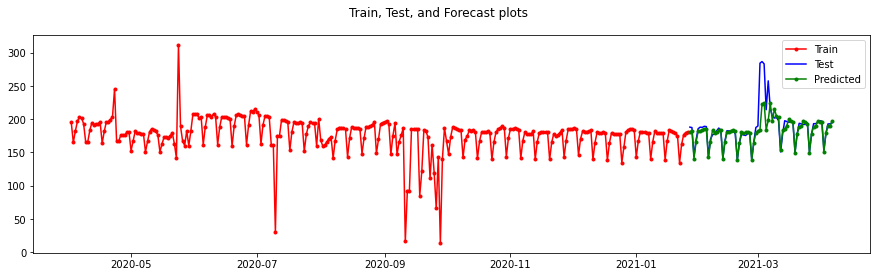

In [ ]:
f15d, f1m, f3m = walk_forward_validation(data, 70)

In [ ]:
f15d.shape, f1m.shape, f3m.shape

((90, 10), (180, 10), (360, 10))

### 15 Days Forecast

In [ ]:
f15d.head()

NR_MSC_1    NR_MSC_2  ...    NR_MSC_9   NR_MSC_10
Date                                ...                        
2021-04-07  182.130531  184.808104  ...  242.178303  195.092311
2021-04-08  183.303874  185.963411  ...  245.665785  196.440073
2021-04-09  181.399882  184.123308  ...  241.926142  195.273103
2021-04-10  159.702571  158.180567  ...  187.430480  150.426719
2021-04-11  169.872364  176.094842  ...  218.144473  177.539339

[5 rows x 10 columns]

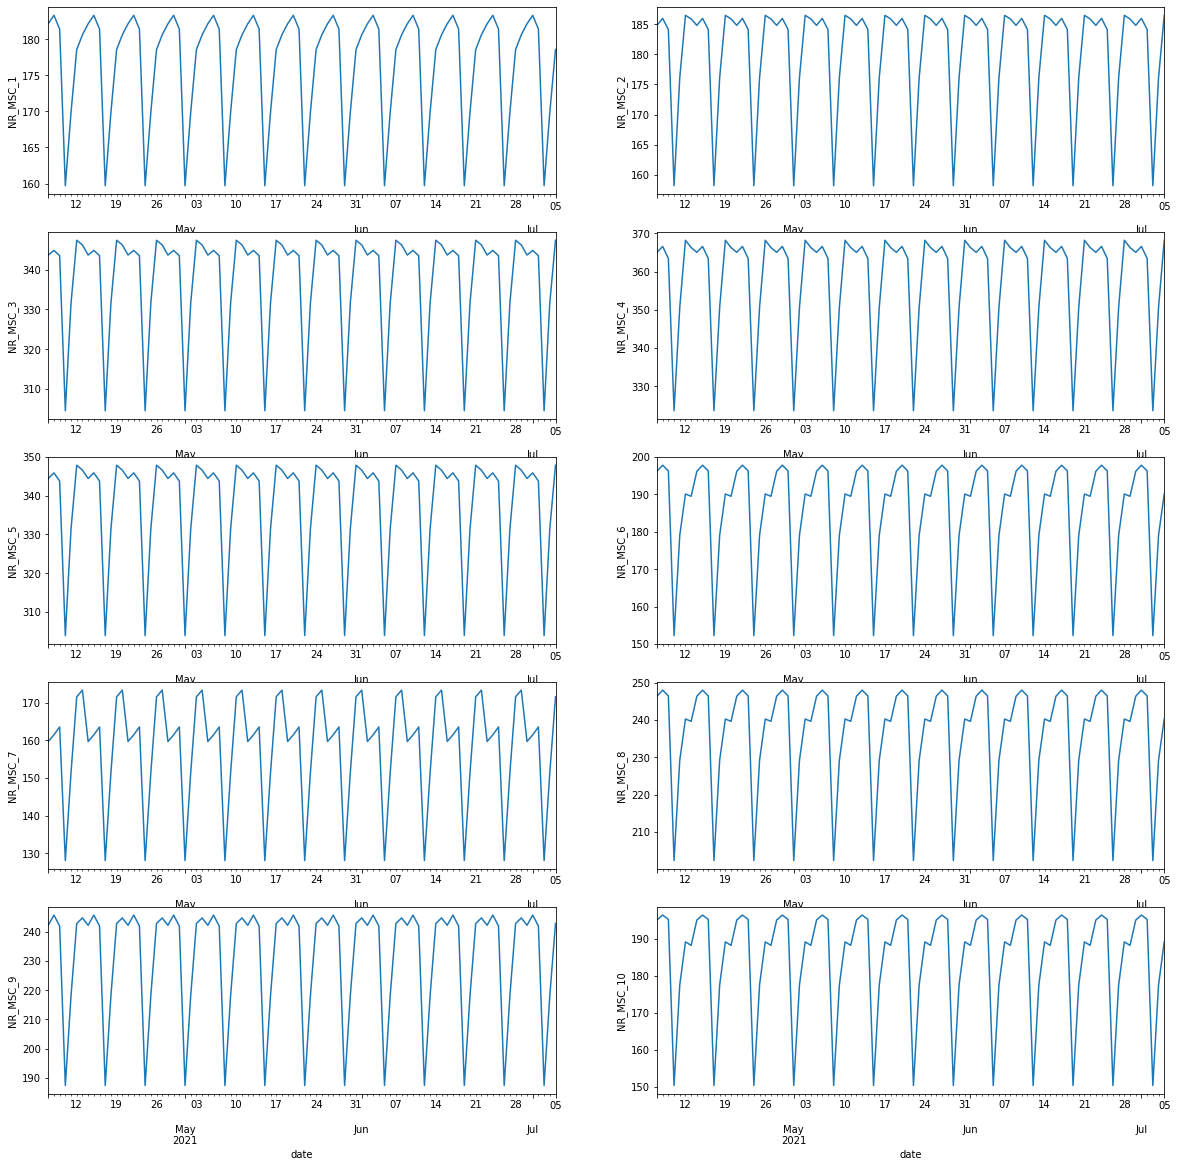

In [ ]:
plot_forecasts(f15d)

### One Month forecast

In [ ]:
f1m.head()

NR_MSC_1    NR_MSC_2  ...    NR_MSC_9   NR_MSC_10
Date                                ...                        
2021-04-07  182.130531  184.808104  ...  242.178303  195.092311
2021-04-08  183.303874  185.963411  ...  245.665785  196.440073
2021-04-09  181.399882  184.123308  ...  241.926142  195.273103
2021-04-10  159.702571  158.180567  ...  187.430480  150.426719
2021-04-11  169.872364  176.094842  ...  218.144473  177.539339

[5 rows x 10 columns]

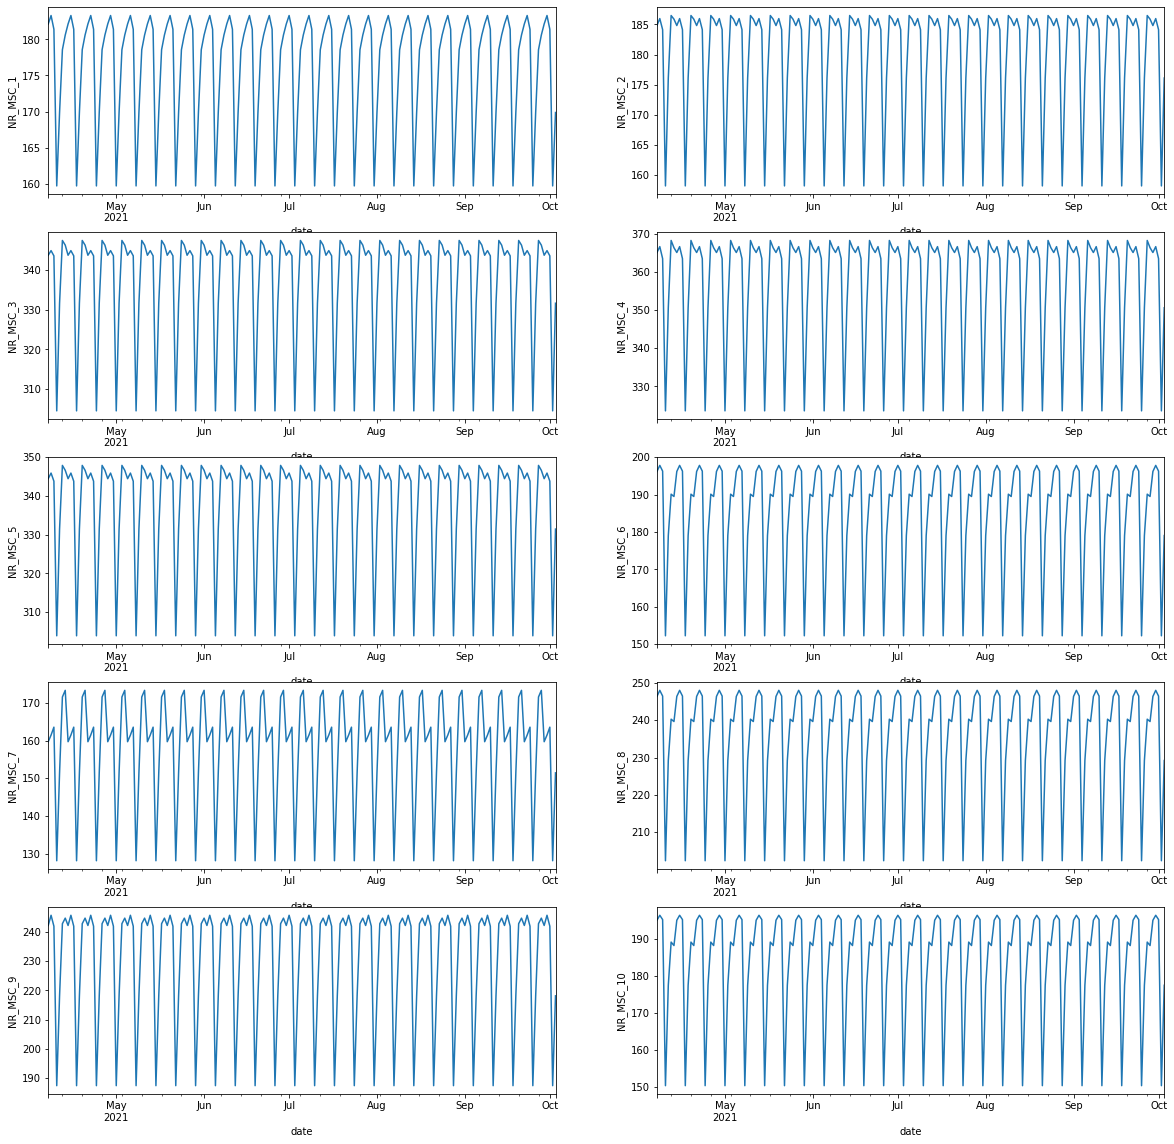

In [ ]:
plot_forecasts(f1m)

### Three Month Forecast

In [ ]:
f3m.head()

NR_MSC_1    NR_MSC_2  ...    NR_MSC_9   NR_MSC_10
Date                                ...                        
2021-04-07  182.130531  184.808104  ...  242.178303  195.092311
2021-04-08  183.303874  185.963411  ...  245.665785  196.440073
2021-04-09  181.399882  184.123308  ...  241.926142  195.273103
2021-04-10  159.702571  158.180567  ...  187.430480  150.426719
2021-04-11  169.872364  176.094842  ...  218.144473  177.539339

[5 rows x 10 columns]

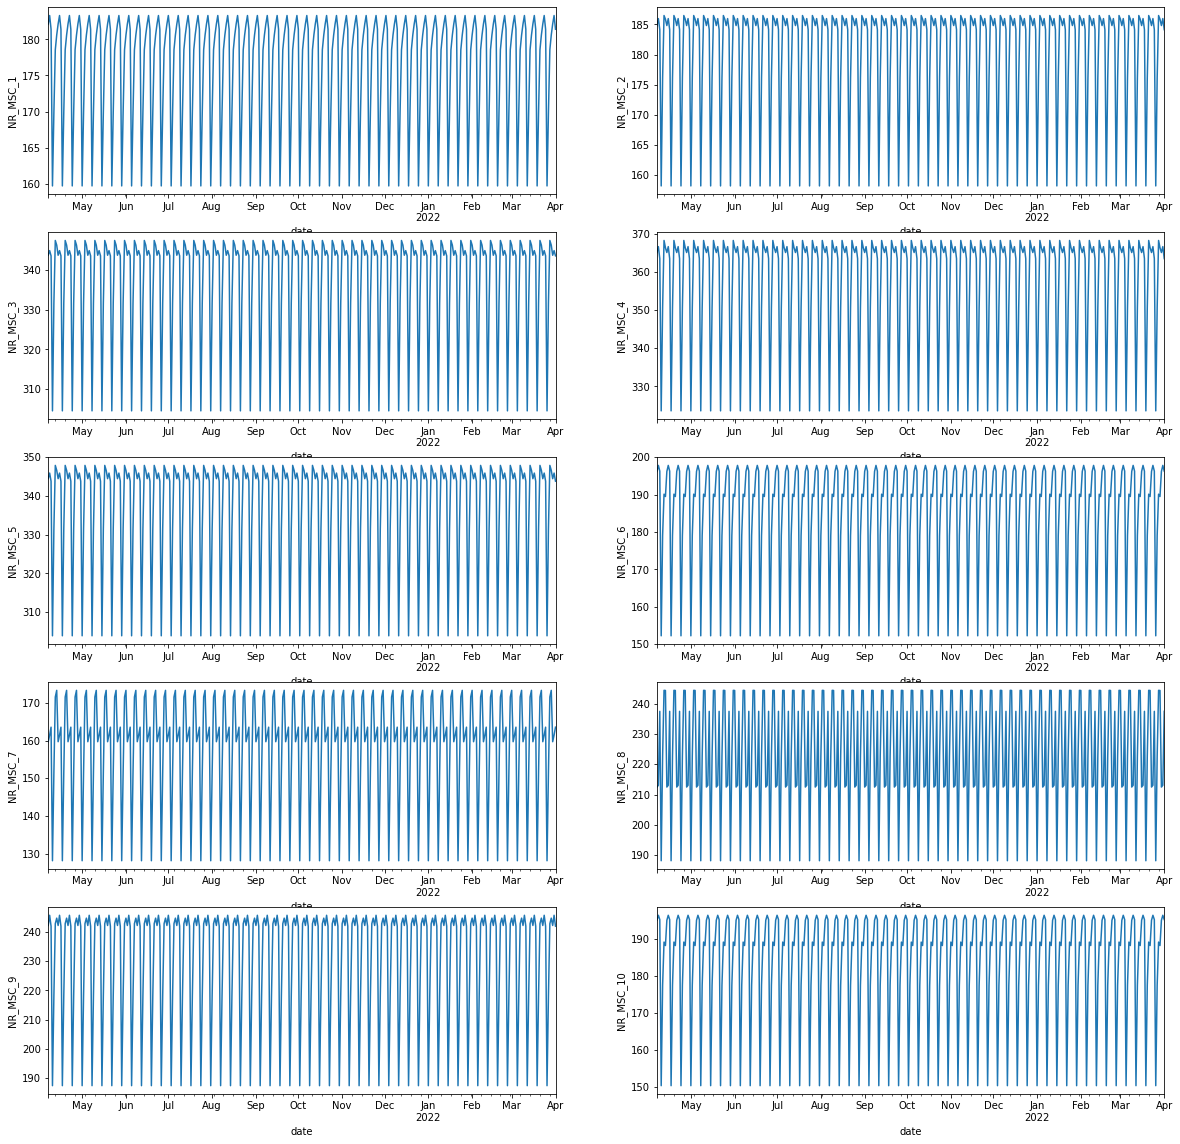

In [ ]:
plot_forecasts(f3m)

# XGBoost

In [ ]:
from xgboost import XGBRegressor

In [ ]:
def train_test_split(data, n_test):
    return data[:-n_test], data[n_test:]

In [ ]:
# transform timeseries dataset into a supervised learning dataset
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    #n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols = list()
    # input sequence (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
    # forecast sequence (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
    # put it all together
    agg = pd.concat(cols, axis=1)
    # drop rows with nan values
    if dropnan:
        agg.dropna(inplace=True)
    return agg.values

In [ ]:
def train_test_split(data, n_test):
    return data[:-n_test], data[-n_test:, :]

In [ ]:
def xgb_forecast(data, model, period):
    for col in data.columns:
        curr_data = data[col]
        predictions = []
        curr_value = []
        for p in range(0, period):
            if p == 0:
                curr_val = [curr_data[-1:]] 
            future = model.predict((curr_val))
            predictions.append(future[0])
            curr_val.clear()
            curr_val.append(future)
            #print(predictions)
        return predictions

In [ ]:
def plothist(train, test, predicted):
    fig = plt.figure(figsize=(15, 4))
    fig.suptitle("Train, Test, and Forecast plots")
    past, = plt.plot(train.index, train.values, 'r.-', label="Train")
    future, = plt.plot(test.index, test.values, color ='blue', label="Test")
    predicted_future, = plt.plot(test.index, predicted, 'g.-', label="Predicted")
    plt.legend()
    plt.show()

In [ ]:
# fit an xgboost model and make a one step prediction
def xgboost_model(train, testX):
    # transfor list into  array
    train = np.asarray(train)
    # split into input and output colums
    trainX, trainy = train[:, :-1], train[:, -1]
    # fit model
    model = XGBRegressor(objective='reg:squarederror', n_estimators=1000)
    model.fit(trainX, trainy)
    yhat = model.predict([testX])
    #print("Test val : ", testX)
    #print("Predicted : ", yhat)
    return yhat[0], model

In [ ]:
def walk_forward_validation(data, n_test):
    forecast_15days, forecast_1Month, forecast_3Months = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    for i in data.columns:
        print("Fitting ", i)
        curr_data = data[i]
        curr_series = series_to_supervised(curr_data.values)
        #print("series", curr_data)
        predictions = list()
        train, test = train_test_split(curr_series, n_test)
        ##
        history = [x for x in train]
        for k in range(len(test)):
            testX, testy = test[k, :1], test[k, -1]
            # fit model on history and make a prediction
            yhat, model = xgboost_model(history, testX)
            # store forecast in list of predictions
            predictions.append(yhat)
            # add actual observation to history for the next loop
            history.append(test[k])
            #print(f"TestX : {testX} testy: {testy} pred {yhat}")
            
        
        mae = mean_absolute_error(test[:, -1], predictions)
        mape = mean_absolute_percentage_error(test[:, -1], predictions)
        mse = mean_squared_error(test[:, -1], predictions)
        rmse = np.sqrt(mse)
        print("MAE  : ", mae)
        print("MAPE : ", mape)
        print("MSE  : ", mse)
        print("RMSE : ", rmse)
        
        plothist(curr_data[:-70], curr_data[-70:], predictions)
        
        # forecast
        forecast_15days[i] = xgb_forecast(data, model, (15+70))
        forecast_1Month[i] = xgb_forecast(data, model, (30+70))
        forecast_3Months[i] = xgb_forecast(data, model, (90+70))
        
    forecast_15days = forecast_15days.iloc[70:]
    forecast_1Month = forecast_1Month.iloc[70:]
    forecast_3Months = forecast_3Months.iloc[70:]
        
    forecast_15days["Date"] = pd.date_range(start= '2021-04-07', periods=15, freq='1D')
    forecast_15days = forecast_15days.set_index("Date")
    forecast_1Month["Date"] = pd.date_range(start= '2021-04-07', periods=30, freq='1D')
    forecast_1Month = forecast_1Month.set_index("Date")
    forecast_3Months["Date"] = pd.date_range(start= '2021-04-07', periods=90, freq='1D')
    forecast_3Months = forecast_3Months.set_index("Date")
        
    return forecast_15days, forecast_1Month, forecast_3Months

Fitting  NR_MSC_1
MAE  :  12.579559781755721
MAPE :  0.07078278538101787
MSE  :  754.322637670945
RMSE :  27.46493469263936


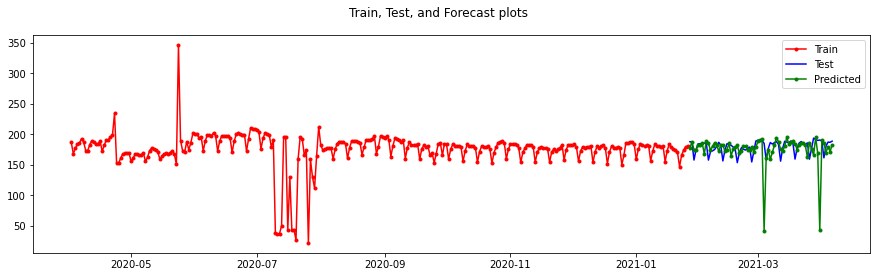

Fitting  NR_MSC_2
MAE  :  9.242303348214287
MAPE :  0.05324344950545871
MSE  :  193.17895990826108
RMSE :  13.898883405089096


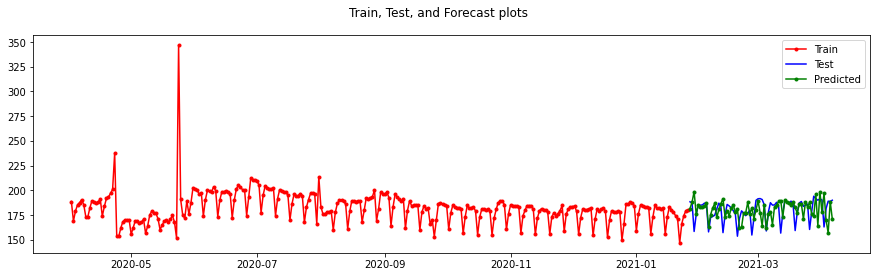

Fitting  NR_MSC_3
MAE  :  11.82426327078683
MAPE :  0.03653608292836791
MSE  :  333.57148550595684
RMSE :  18.26393948484162


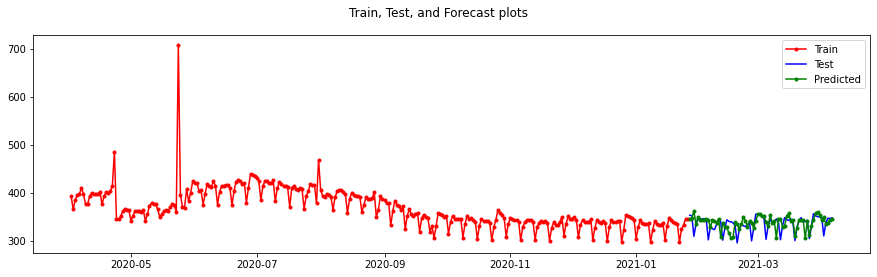

Fitting  NR_MSC_4
MAE  :  12.993557589285716
MAPE :  0.03688445327142904
MSE  :  388.0658586259633
RMSE :  19.699387265241608


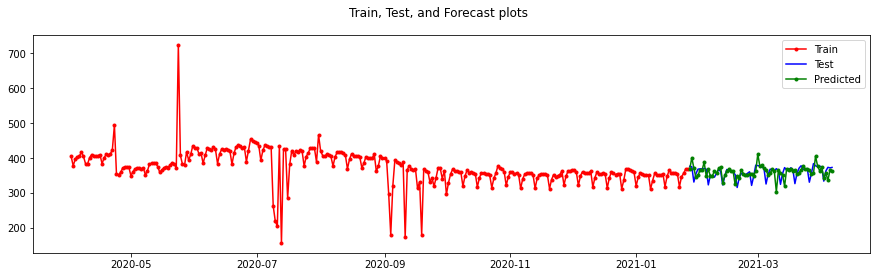

Fitting  NR_MSC_5
MAE  :  13.321012642996655
MAPE :  0.041156957667774975
MSE  :  451.39597849321586
RMSE :  21.246081485610844


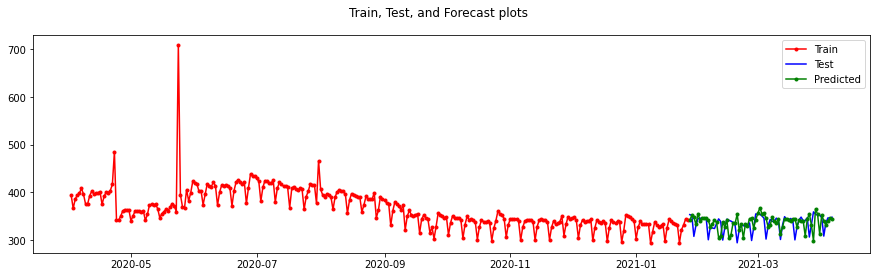

Fitting  NR_MSC_6
MAE  :  18.316037355259486
MAPE :  0.097077498713612
MSE  :  839.6652298233133
RMSE :  28.976977582613983


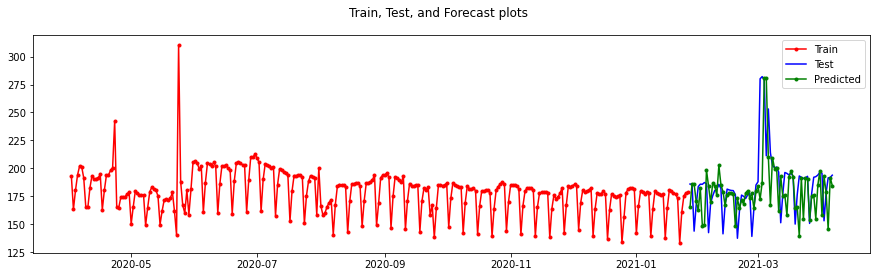

Fitting  NR_MSC_7
MAE  :  12.201156856863841
MAPE :  0.08164835528302207
MSE  :  367.3608465884867
RMSE :  19.166659766075224


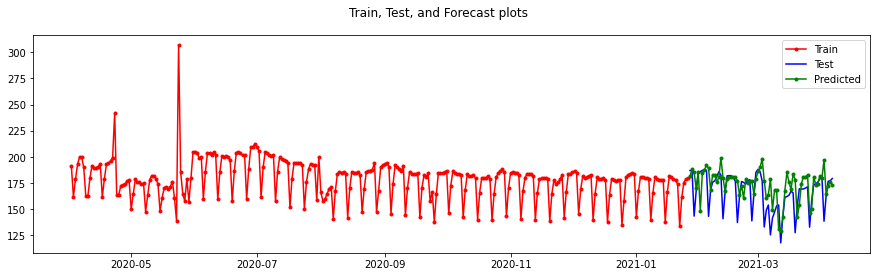

Fitting  NR_MSC_8
MAE  :  18.422988169642856
MAPE :  0.07664677838811376
MSE  :  841.643278343966
RMSE :  29.011088885872002


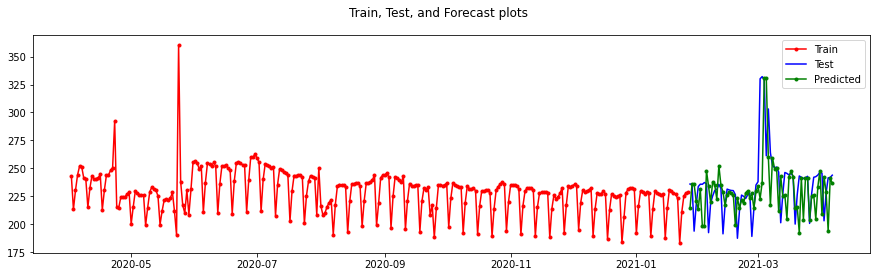

Fitting  NR_MSC_9
MAE  :  20.346409981863843
MAPE :  0.0979468157842962
MSE  :  878.0397375240905
RMSE :  29.6317353107119


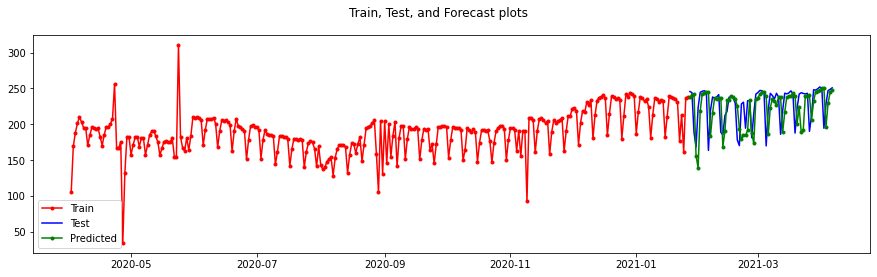

Fitting  NR_MSC_10
MAE  :  16.53197215053014
MAPE :  0.08630356958438552
MSE  :  723.971394426935
RMSE :  26.90671653002155


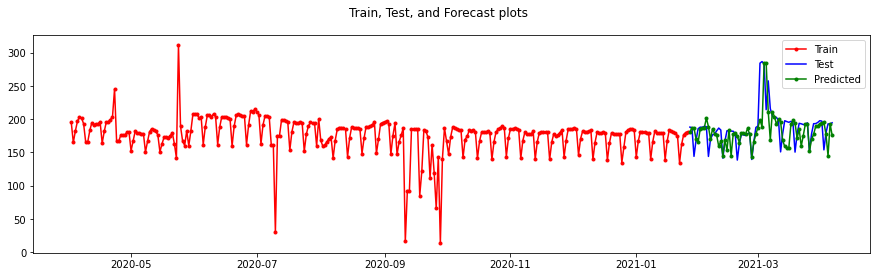

In [ ]:
f15d, f1m, f3m = walk_forward_validation(data, 70)

In [ ]:
f15d.head()

NR_MSC_1    NR_MSC_2  ...    NR_MSC_9   NR_MSC_10
Date                                ...                        
2021-04-07  179.113998  181.135925  ...  185.140839  120.329803
2021-04-08  177.516357  182.366348  ...  201.336136   69.636353
2021-04-09  155.747620  180.041916  ...  205.109695  143.538071
2021-04-10  173.689224  181.135925  ...  144.356018  168.947128
2021-04-11  179.113998  182.366348  ...  160.813248  179.546310

[5 rows x 10 columns]

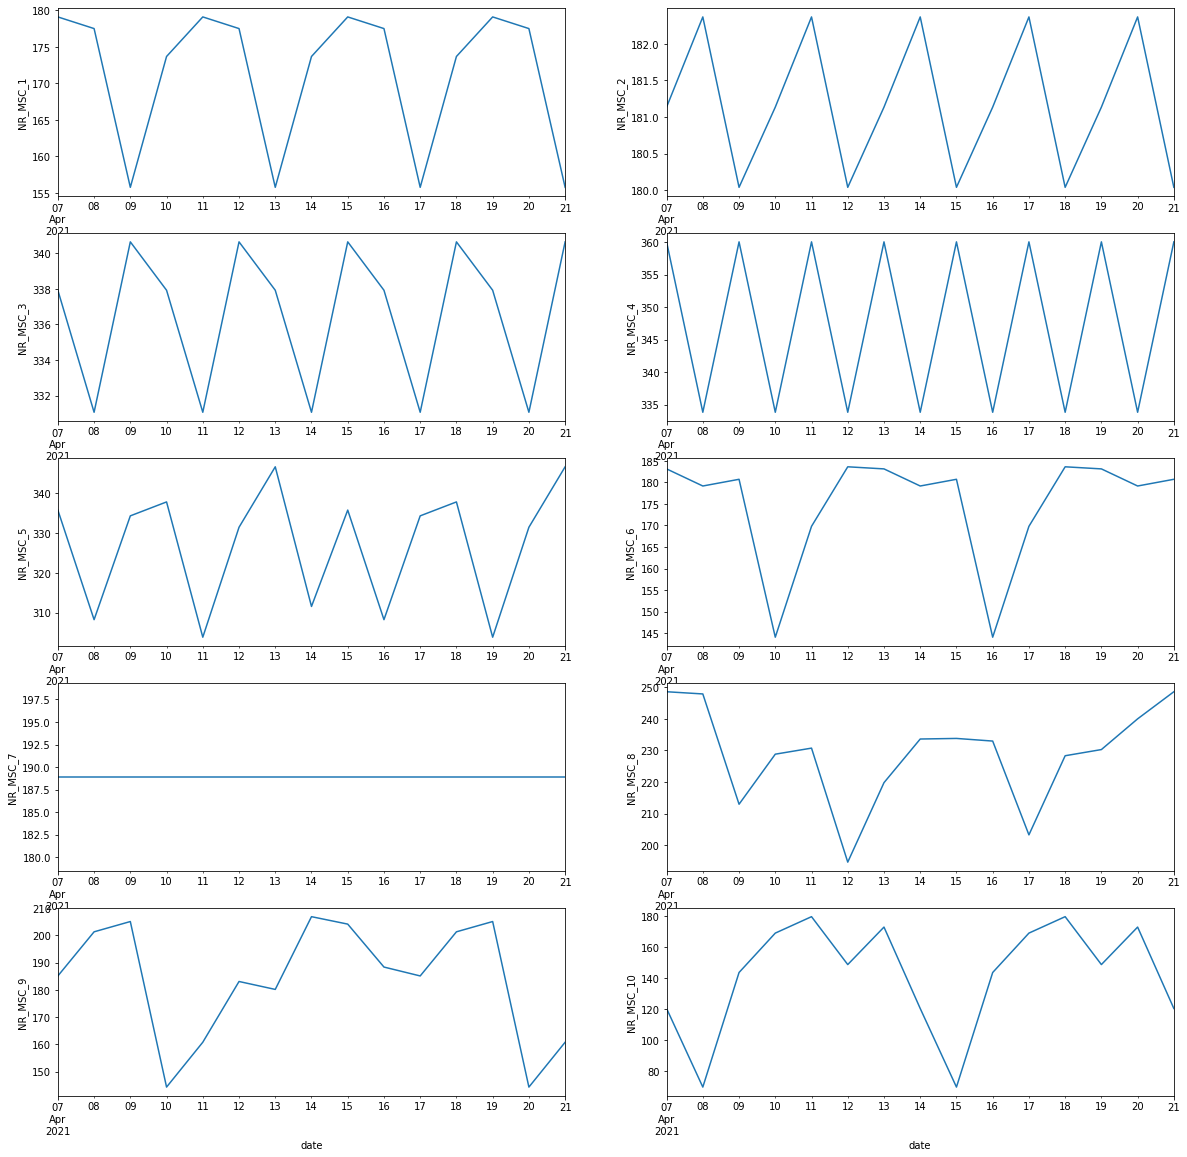

In [ ]:
plot_forecasts(f15d)

In [ ]:
f1m.head()

NR_MSC_1    NR_MSC_2  ...    NR_MSC_9   NR_MSC_10
Date                                ...                        
2021-04-07  179.113998  181.135925  ...  185.140839  120.329803
2021-04-08  177.516357  182.366348  ...  201.336136   69.636353
2021-04-09  155.747620  180.041916  ...  205.109695  143.538071
2021-04-10  173.689224  181.135925  ...  144.356018  168.947128
2021-04-11  179.113998  182.366348  ...  160.813248  179.546310

[5 rows x 10 columns]

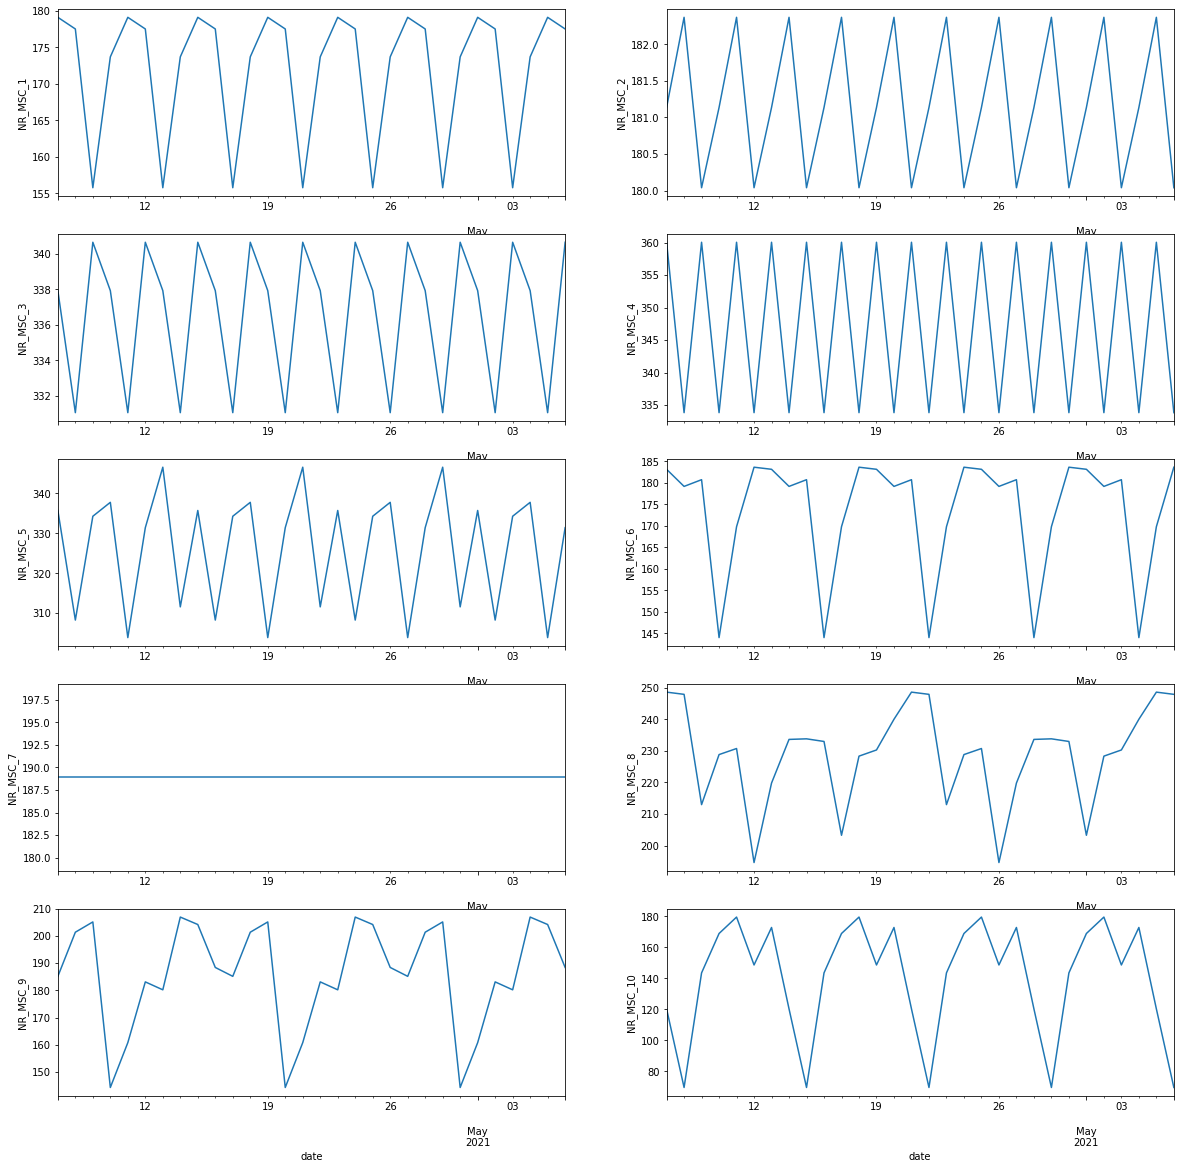

In [ ]:
plot_forecasts(f1m)

In [ ]:
f3m.head()

NR_MSC_1    NR_MSC_2  ...    NR_MSC_9   NR_MSC_10
Date                                ...                        
2021-04-07  179.113998  181.135925  ...  185.140839  120.329803
2021-04-08  177.516357  182.366348  ...  201.336136   69.636353
2021-04-09  155.747620  180.041916  ...  205.109695  143.538071
2021-04-10  173.689224  181.135925  ...  144.356018  168.947128
2021-04-11  179.113998  182.366348  ...  160.813248  179.546310

[5 rows x 10 columns]

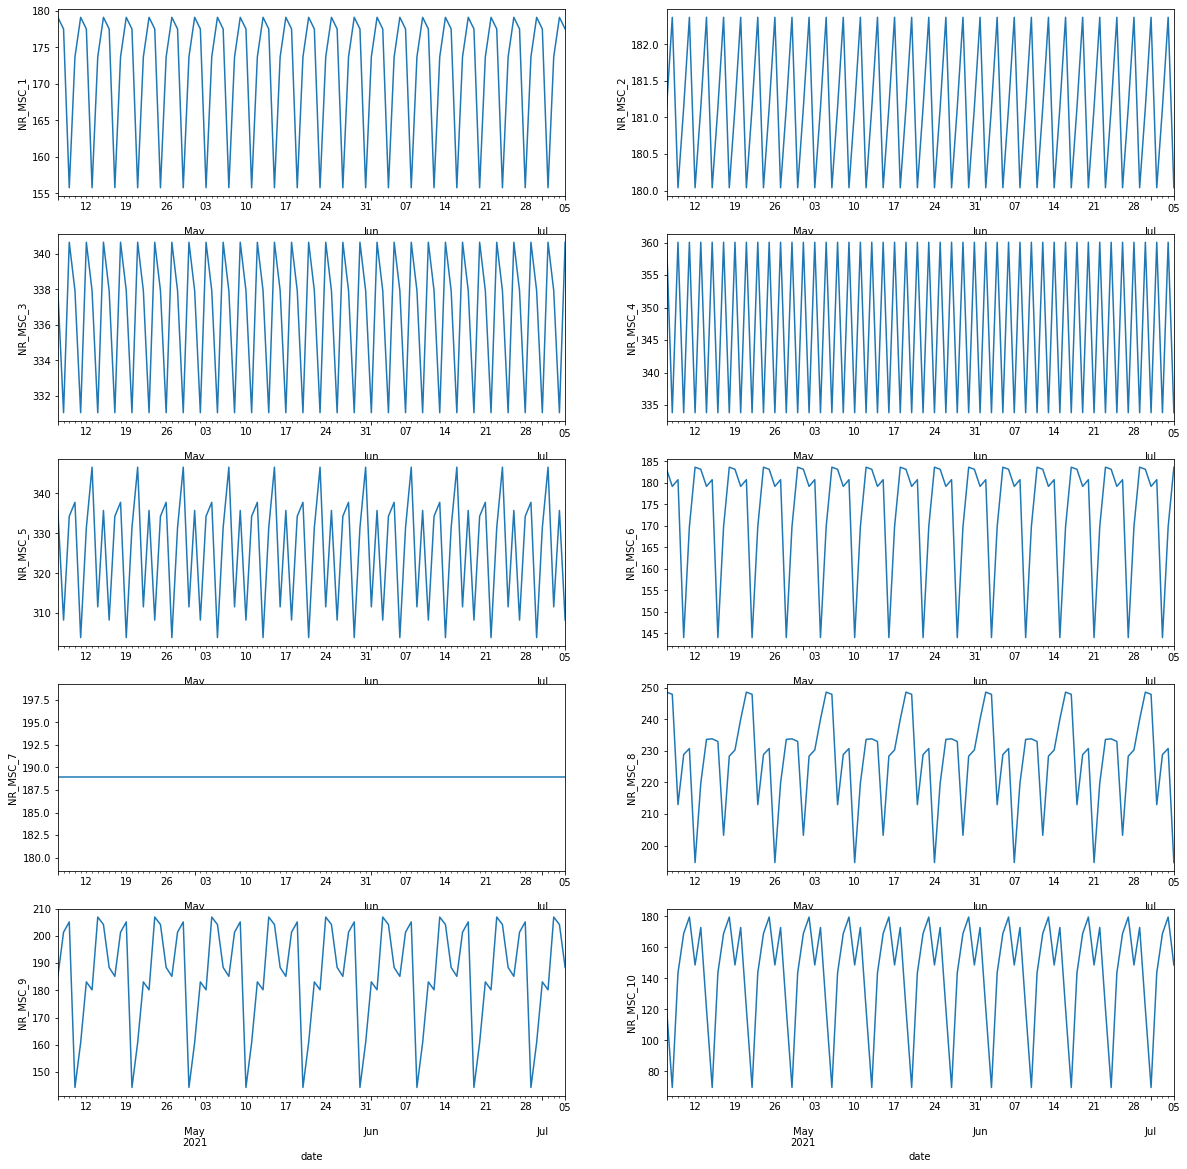

In [ ]:
plot_forecasts(f3m)

# PROPHET

In [ ]:
from fbprophet import Prophet
from sklearn.metrics import mean_absolute_error, mean_absolute_percentage_error, mean_squared_error
import warnings
warnings.filterwarnings('ignore')

In [ ]:
data.tail()

MSC_Id      NR_MSC_1  NR_MSC_2  NR_MSC_3  ...  NR_MSC_8  NR_MSC_9  NR_MSC_10
2021-04-02   161.253   162.989   309.678  ...   202.999   194.302    153.917
2021-04-03   180.222   181.657   337.292  ...   227.654   228.045    179.374
2021-04-04   187.117   189.028   346.482  ...   241.455   246.853    192.928
2021-04-05   186.749   188.786   345.958  ...   241.824   248.553    193.073
2021-04-06   188.622   190.014   347.386  ...   243.856   250.718    194.612

[5 rows x 10 columns]

In [ ]:
def plot_hist(train, test, predicted):
    fig = plt.figure(figsize=(15, 4))
    fig.suptitle("Train, Test, and Forecast plots")
    past, = plt.plot(train.index, train['y'], 'r.-', label="Train")
    future, = plt.plot(test.index, test['y'], color ='blue', label="Test")
    predicted_future, = plt.plot(test.index, predicted, 'g.-', label="Predicted")
    plt.legend()
    plt.show()

In [ ]:
def prophet_forecast(model, start_date, period):
    dates = pd.date_range(start_date, periods=period)
    future = pd.DataFrame(dates)
    future.columns = ['ds']
    future['ds'] = pd.to_datetime(future['ds'])
    preds = model.predict(future)
    return preds['yhat']

In [ ]:
def model(start_date):
    forecast_15days, forecast_1Month, forecast_3Months = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    for i in data.columns:
        print(i)
        df = pd.DataFrame()
        df['ds'] = data.index
        df['index'] = data.index
        df = df.set_index('index')
        df['y'] = data[i].values
        df['ds'] = pd.to_datetime(df['ds'])
        train, test = df[:300], df[300:]
#         print(train.shape)
#         print(test.shape)
        model = Prophet(daily_seasonality=True, yearly_seasonality=False)
        model.fit(train)
        
        # validation
        y_pred = model.predict(test)['yhat']
        mae = mean_absolute_error(test['y'], y_pred)
        mape = mean_absolute_percentage_error(test['y'], y_pred)
        mse = mean_squared_error(test['y'], y_pred)
        rmse = np.sqrt(mse)
        print("MAE  : ", mae)
        print("MAPE : ", mape)
        print("MSE  : ", mse)
        print("RMSE : ", rmse)
        
        
        # forecast
        plot_hist(train, test, y_pred)
        
        forecast_15days[i] = prophet_forecast(model,start_date, (15+70))
        forecast_1Month[i] = prophet_forecast(model,start_date, (30+70))
        forecast_3Months[i] = prophet_forecast(model,start_date, (90+70))
        
        
    forecast_15days = forecast_15days.iloc[70:]
    forecast_1Month = forecast_1Month.iloc[70:]
    forecast_3Months = forecast_3Months.iloc[70:]
        
    forecast_15days["Date"] = pd.date_range(start= '2021-04-07', periods=15, freq='1D')
    forecast_15days = forecast_15days.set_index("Date")
    forecast_1Month["Date"] = pd.date_range(start= '2021-04-07', periods=30, freq='1D')
    forecast_1Month = forecast_1Month.set_index("Date")
    forecast_3Months["Date"] = pd.date_range(start= '2021-04-07', periods=90, freq='1D')
    forecast_3Months = forecast_3Months.set_index("Date")
        
    return forecast_15days, forecast_1Month, forecast_3Months

NR_MSC_1
MAE  :  5.662492833255455
MAPE :  0.030959453923748003
MSE  :  45.41828766493501
RMSE :  6.739309138549367


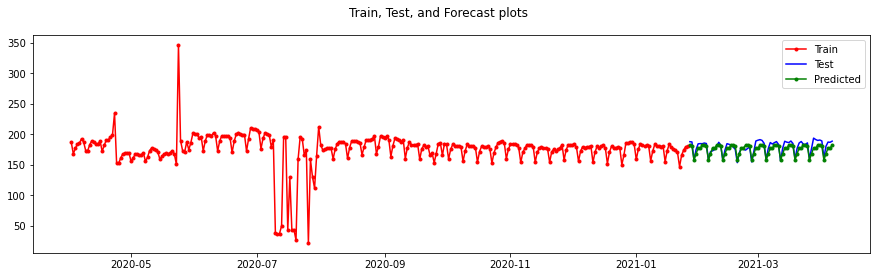

NR_MSC_2
MAE  :  8.991682602928442
MAPE :  0.04910997098904806
MSE  :  103.02054560390336
RMSE :  10.149903723873608


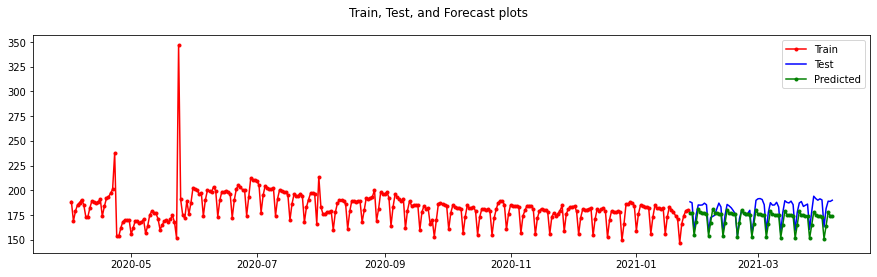

NR_MSC_3
MAE  :  10.156138831691147
MAPE :  0.029880095819760224
MSE  :  142.21082039561028
RMSE :  11.92521783430434


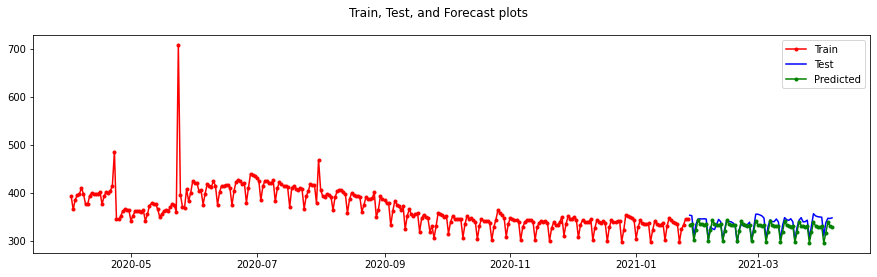

NR_MSC_4
MAE  :  19.433594598826648
MAPE :  0.05398748508998368
MSE  :  455.80619367308617
RMSE :  21.34961811539228


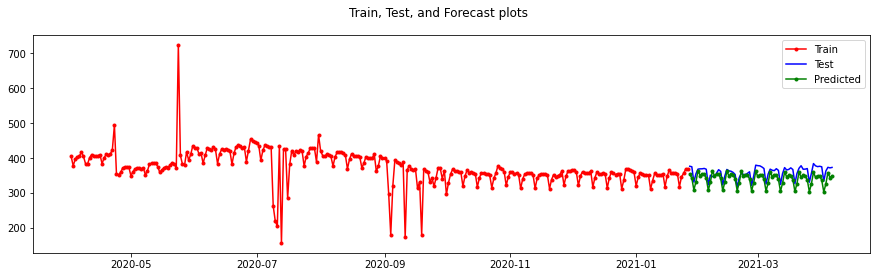

NR_MSC_5
MAE  :  12.79894019500884
MAPE :  0.03769864313537457
MSE  :  213.41267354106557
RMSE :  14.608650640667179


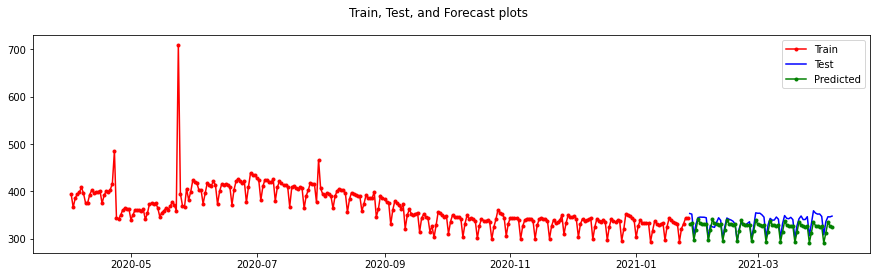

NR_MSC_6
MAE  :  19.83542739864952
MAPE :  0.09577614994631047
MSE  :  956.1819399738966
RMSE :  30.922191707152592


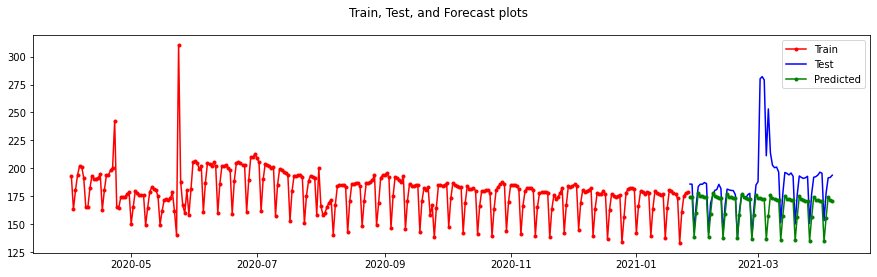

NR_MSC_7
MAE  :  8.228622744950968
MAPE :  0.05321848976697073
MSE  :  152.9889653135968
RMSE :  12.368870818049512


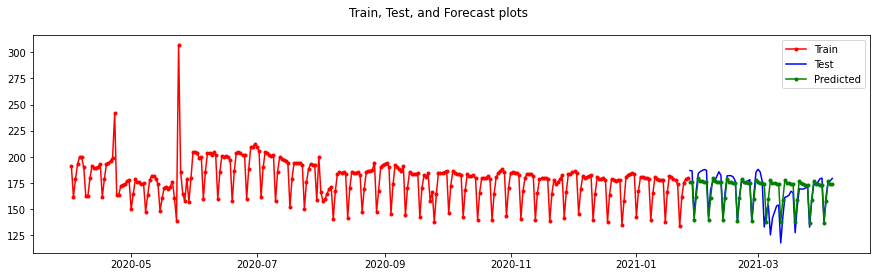

NR_MSC_8
MAE  :  19.83585961113795
MAPE :  0.07676088927995947
MSE  :  955.9459072430159
RMSE :  30.918374912711954


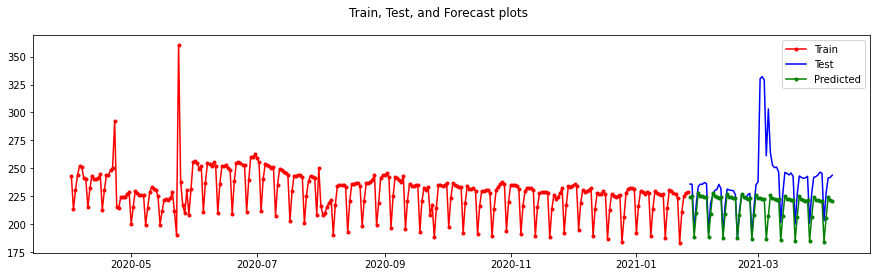

NR_MSC_9
MAE  :  18.528694458315897
MAPE :  0.08906778457145258
MSE  :  523.707476348411
RMSE :  22.884655915010192


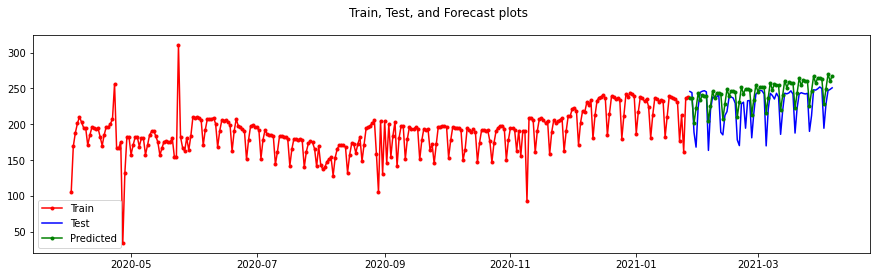

NR_MSC_10
MAE  :  14.347806586667458
MAPE :  0.06625750991317896
MSE  :  737.061862142193
RMSE :  27.148883257736276


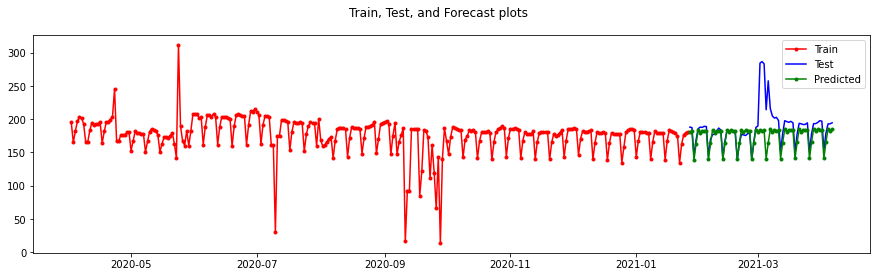

In [ ]:
f15d, f1m, f3m = model('2021-04-06')

# 15 Days Forecast

In [ ]:
f15d.head()

NR_MSC_1    NR_MSC_2  ...    NR_MSC_9   NR_MSC_10
Date                                ...                        
2021-04-07  182.208529  170.084238  ...  297.487257  187.506334
2021-04-08  182.436674  169.598219  ...  296.865732  186.494814
2021-04-09  180.571244  169.250207  ...  296.382251  187.087543
2021-04-10  158.048787  146.784635  ...  261.228084  144.481421
2021-04-11  168.104007  160.010601  ...  282.224857  168.489002

[5 rows x 10 columns]

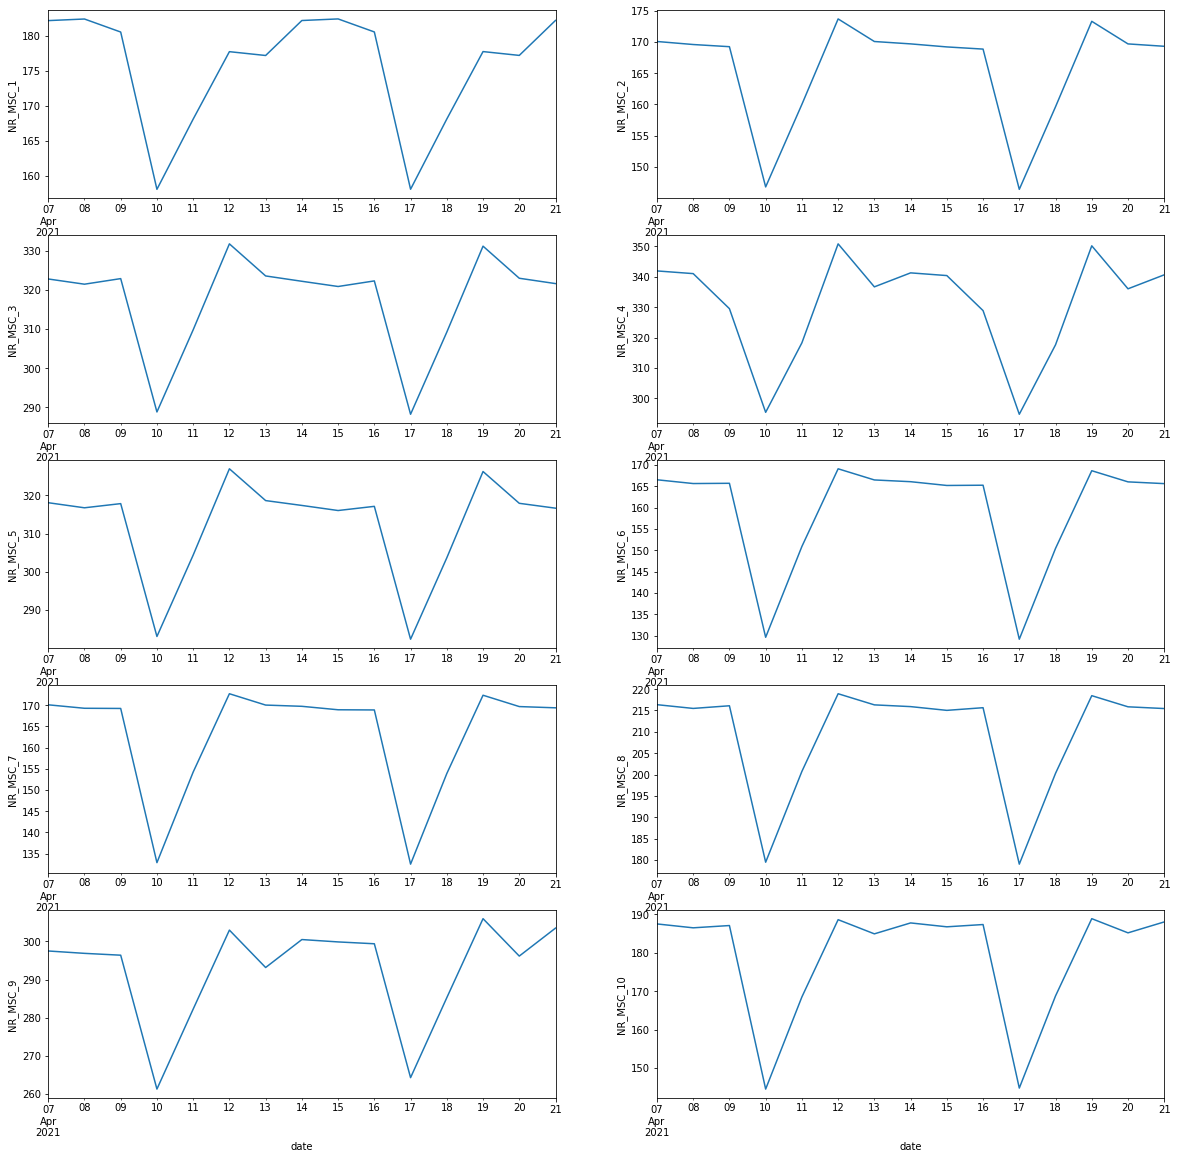

In [ ]:
plot_forecasts(f15d)

# One Month Forecast

In [ ]:
f1m.head()

NR_MSC_1    NR_MSC_2  ...    NR_MSC_9   NR_MSC_10
Date                                ...                        
2021-04-07  182.208529  170.084238  ...  297.487257  187.506334
2021-04-08  182.436674  169.598219  ...  296.865732  186.494814
2021-04-09  180.571244  169.250207  ...  296.382251  187.087543
2021-04-10  158.048787  146.784635  ...  261.228084  144.481421
2021-04-11  168.104007  160.010601  ...  282.224857  168.489002

[5 rows x 10 columns]

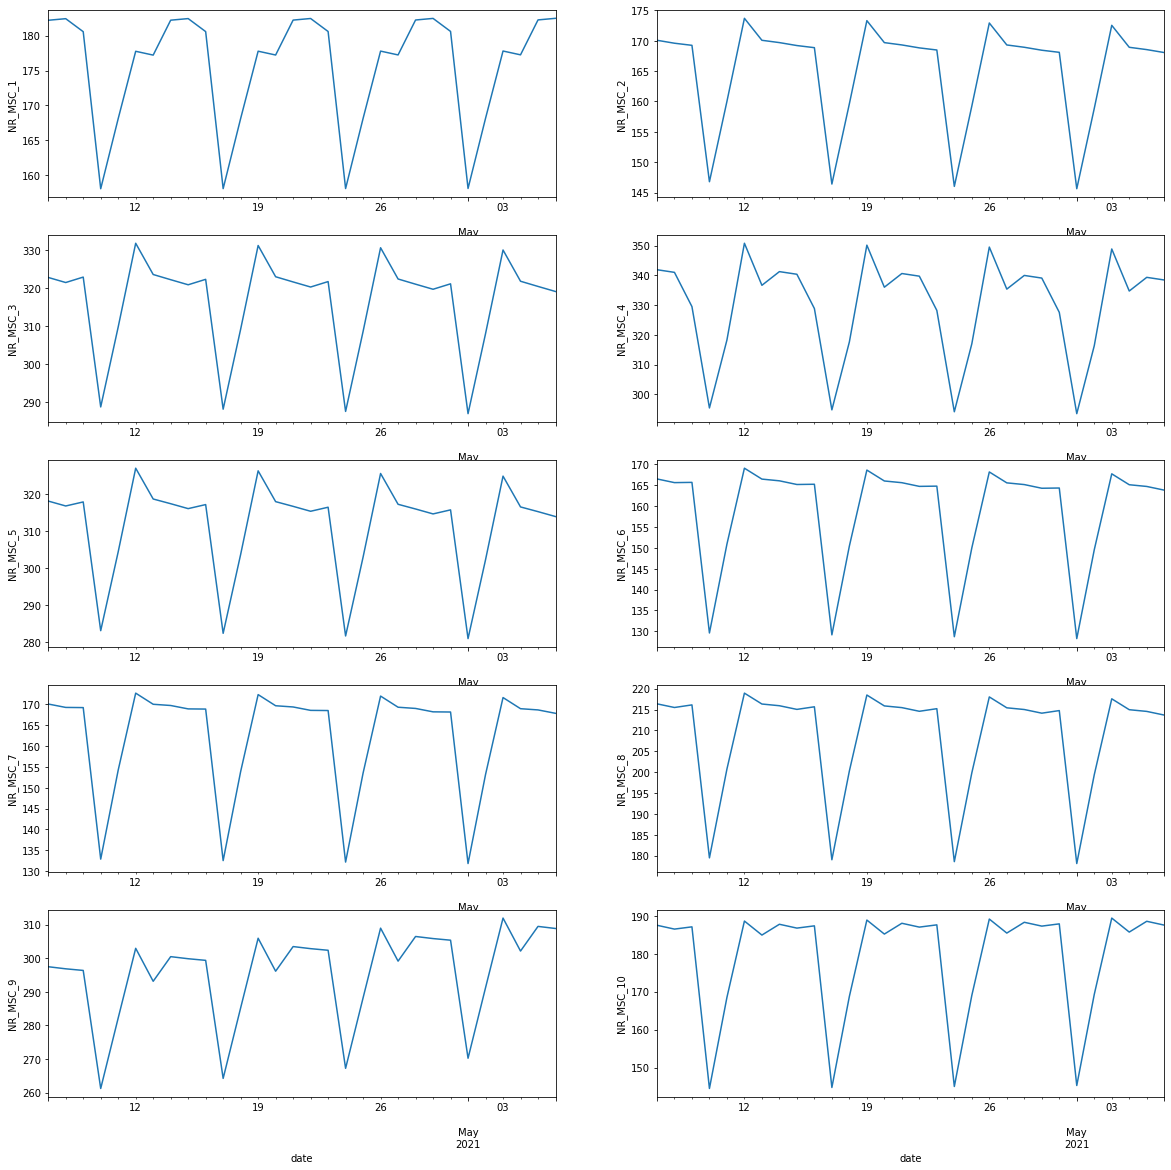

In [ ]:
plot_forecasts(f1m)

# Three Month Forecast

In [ ]:
f3m.head()

NR_MSC_1    NR_MSC_2  ...    NR_MSC_9   NR_MSC_10
Date                                ...                        
2021-04-07  182.208529  170.084238  ...  297.487257  187.506334
2021-04-08  182.436674  169.598219  ...  296.865732  186.494814
2021-04-09  180.571244  169.250207  ...  296.382251  187.087543
2021-04-10  158.048787  146.784635  ...  261.228084  144.481421
2021-04-11  168.104007  160.010601  ...  282.224857  168.489002

[5 rows x 10 columns]

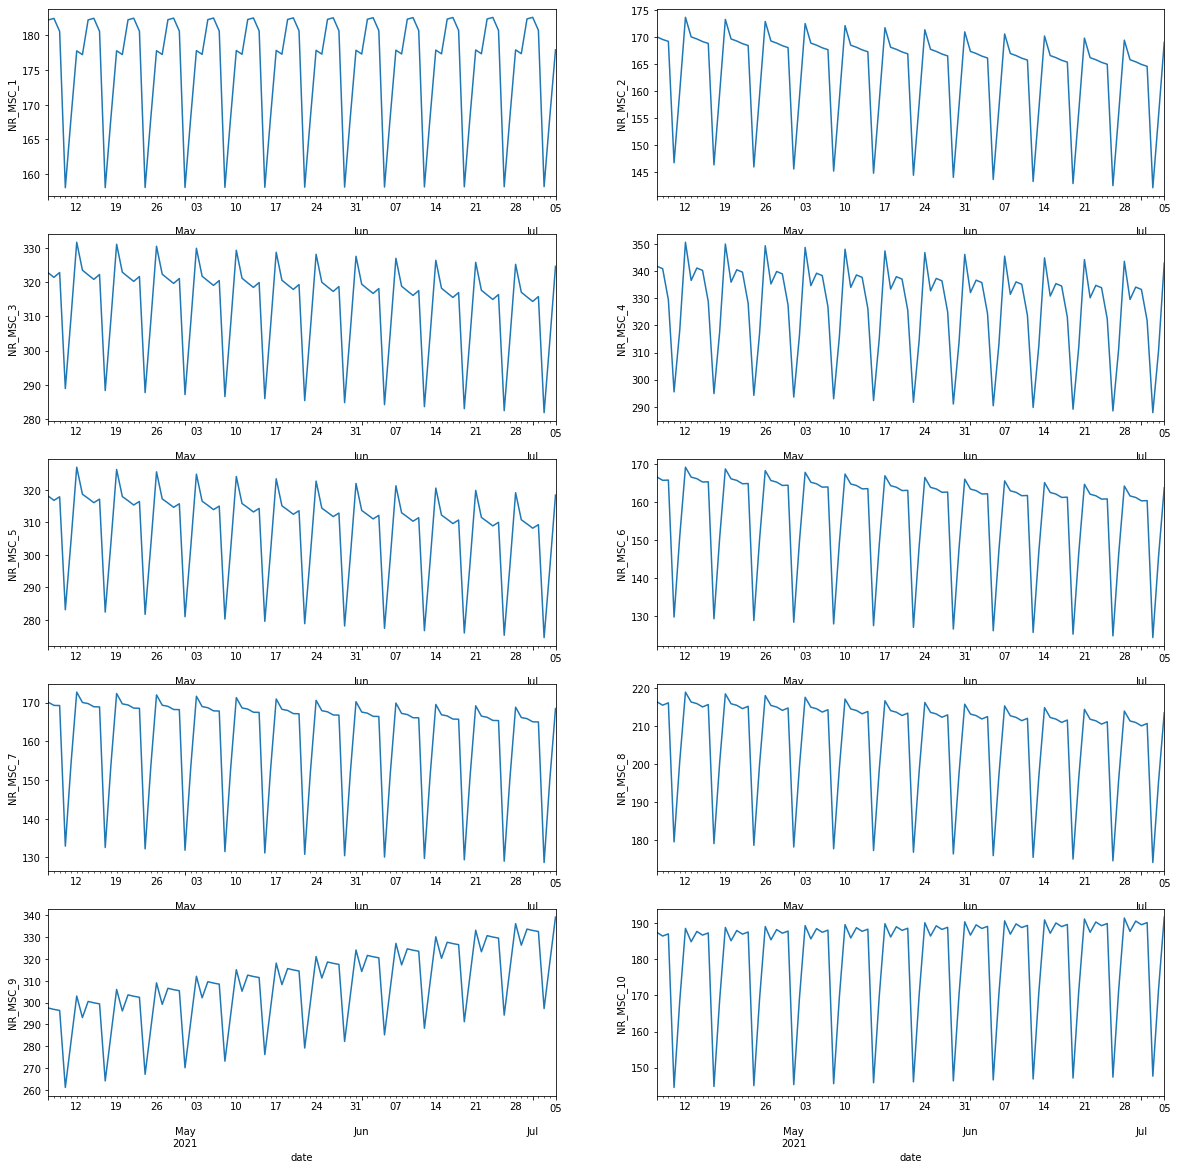

In [ ]:
plot_forecasts(f3m)

# LSTM

In [ ]:
n_past = 14
n_future = 10
n_features = 1

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))

In [ ]:
cols = data.columns
dt = pd.DataFrame(scaler.fit_transform(data))
dt.columns = cols
dt.index = data.index

In [ ]:
dt.head()

MSC_Id      NR_MSC_1  NR_MSC_2  NR_MSC_3  ...  NR_MSC_8  NR_MSC_9  NR_MSC_10
2020-04-02  0.509794  0.209457  0.237154  ...  0.337439  0.260006   0.610539
2020-04-03  0.450955  0.111292  0.169907  ...  0.170163  0.488726   0.508397
2020-04-04  0.478452  0.160966  0.218479  ...  0.265829  0.557572   0.566126
2020-04-05  0.500684  0.193480  0.241465  ...  0.343853  0.604424   0.615059
2020-04-06  0.505322  0.203914  0.246133  ...  0.389284  0.637924   0.638543

[5 rows x 10 columns]

In [ ]:
def split(data, split_idx):
    train, test = data.iloc[:split_idx], data.iloc[split_idx:]
    return train, test

In [ ]:
def split_series(series, n_past, n_future):
    series = np.array(series).reshape(-1, 1)
    X, y = list(), list()
    for window_start in range(len(series)):
        past_end = window_start + n_past
        future_end = past_end + n_future
        if future_end > len(series):
            break
            
        # slicing the past and future parts of the window
        past, future = series[window_start:past_end, :], series[past_end:future_end, :]
        X.append(past)
        y.append(future)
    return np.array(X), np.array(y)

In [ ]:
def train_set_preprocess(train_set, n_past, n_future):
    X_train, y_train = split_series(train_set.values, n_past, n_future)
    X_train = X_train.reshape((X_train.shape[0], n_past, n_features))
    y_train = y_train.reshape((X_train.shape[0], n_future, n_features))
    return X_train, y_train
def test_set_preprocess(test_set, n_past, n_future):
    X_test, y_test = split_series(test_set.values, n_past, n_future)
    X_test = X_test.reshape((X_test.shape[0], n_past, n_features))
    y_test = y_test.reshape((X_test.shape[0], n_future, n_features))
    return X_test, y_test

In [ ]:
import keras.backend as k
k.clear_session()

In [ ]:
from keras.models import Sequential
from keras.layers import LSTM, Dense, Input, Bidirectional, Dropout

def create_model(n_past, n_features):
    model = Sequential()
    model.add(Input(shape=(n_past, n_features)))
    model.add(LSTM(360, activation='relu', return_sequences=True))
    model.add(LSTM(30, activation='relu', return_sequences=False))
    model.add(Dense(n_future, activation='linear'))
    return model

In [ ]:
model = create_model(n_past, n_features)
model.summary()

# model =bilstm_model(64)
# model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 14, 360)           521280    
                                                                 
 lstm_1 (LSTM)               (None, 30)                46920     
                                                                 
 dense (Dense)               (None, 10)                310       
                                                                 
Total params: 568,510
Trainable params: 568,510
Non-trainable params: 0
_________________________________________________________________


In [ ]:
def forecast(data, model, period):
    for col in data.columns:
        curr_data = data[col]
        past_10_hist = list(curr_data[-14:])
        predictions = []
        for p in range(0, period):
            past_10 = np.array(past_10_hist).reshape(1, 14, 1)
        
            #print(past_10)
            [future] = model.predict(past_10)
            future = future[0]
            predictions.append(future)
            #print("Future : ", future[0])
            past_10_hist.pop(0)
            past_10_hist.append(future)
        return predictions

In [ ]:
def plot(train, test, y_test, predicted):
    fig = plt.figure(figsize=(15, 4))
    fig.suptitle("Train, Test, and Forecast plots")
    past, = plt.plot(train.index, train, 'r.-', label="Train")
    future, = plt.plot(test.index[-70:], y_test[-70:], color ='blue', label="Test")
    predicted_future, = plt.plot(test.index[-70:], predicted[-70:], 'g.-', label="Predicted")
    plt.legend()
    plt.show()

In [ ]:
def models(data, split_idx):
    forecast_15days, forecast_1Month, forecast_3Months = pd.DataFrame(), pd.DataFrame(), pd.DataFrame()
    for i in range(0, len(data.columns)):
        warnings.resetwarnings()
        warnings.filterwarnings('ignore')
        tf.keras.backend.clear_session()
        curr_data = data[data.columns[i]]
        print("Fitting ", data.columns[i])
        train, test = split(curr_data, split_idx)
        X_train, y_train = train_set_preprocess(train, n_past, n_future)
        X_test, y_test = test_set_preprocess(test, n_past, n_future)
        
        #reduce_lr = tf.keras.callbacks.LearningRateScheduler(lambda x: 1e-3 * 0.90 ** x)

        model.compile(optimizer='adam', loss='mse')
        history=model.fit(X_train,y_train,epochs=20, batch_size=30,verbose=1)
        
        # validation
        y_pred = model.predict(X_test)
        mae = mean_absolute_error(y_test.reshape(-1, 1), y_pred.reshape(-1, 1))
        mape = mean_absolute_percentage_error(y_test.reshape(-1, 1), y_pred.reshape(-1, 1))
        mse = mean_squared_error(y_test.reshape(-1, 1), y_pred.reshape(-1, 1))
        rmse = np.sqrt(mse)
        print("MAE  : ", mae)
        print("MAPE : ", mape)
        print("MSE  : ", mse)
        print("RMSE : ", rmse)
        
        plot(train, test, y_test.reshape(-1, 1), y_pred.reshape(-1, 1))
        
        # Forecast
       
        forecast_15days[data.columns[i]] = forecast(data, model, (15+70))
        forecast_1Month[data.columns[i]] = forecast(data, model, (30+70))
        forecast_3Months[data.columns[i]] = forecast(data, model, (90+70))
        
    forecast_15days = forecast_15days.iloc[70:]
    forecast_1Month = forecast_1Month.iloc[70:]
    forecast_3Months = forecast_3Months.iloc[70:]
        
    forecast_15days["Date"] = pd.date_range(start= '2021-04-07', periods=15, freq='1D')
    forecast_15days = forecast_15days.set_index("Date")
    forecast_1Month["Date"] = pd.date_range(start= '2021-04-07', periods=30, freq='1D')
    forecast_1Month = forecast_1Month.set_index("Date")
    forecast_3Months["Date"] = pd.date_range(start= '2021-04-07', periods=90, freq='1D')
    forecast_3Months = forecast_3Months.set_index("Date")
        
    return forecast_15days, forecast_1Month, forecast_3Months

### Fitting daily data

Fitting  NR_MSC_1
Epoch 1/20
10/10 [==============================] - 3s 71ms/step - loss: 2829.8066
Epoch 2/20
10/10 [==============================] - 1s 70ms/step - loss: 1249.6611
Epoch 3/20
10/10 [==============================] - 1s 69ms/step - loss: 1018.9334
Epoch 4/20
10/10 [==============================] - 1s 75ms/step - loss: 953.5774
Epoch 5/20
10/10 [==============================] - 1s 69ms/step - loss: 922.0049
Epoch 6/20
10/10 [==============================] - 1s 67ms/step - loss: 913.5107
Epoch 7/20
10/10 [==============================] - 1s 67ms/step - loss: 933.7936
Epoch 8/20
10/10 [==============================] - 1s 71ms/step - loss: 938.1304
Epoch 9/20
10/10 [==============================] - 1s 69ms/step - loss: 928.4526
Epoch 10/20
10/10 [==============================] - 1s 66ms/step - loss: 930.7107
Epoch 11/20
10/10 [==============================] - 1s 70ms/step - loss: 947.5899
Epoch 12/20
10/10 [==============================] - 1s 68ms/step - loss: 8

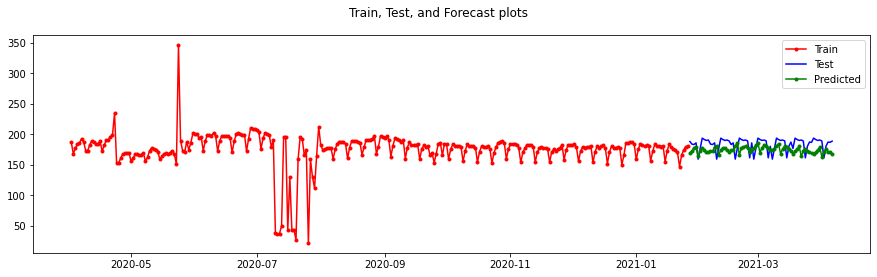

Fitting  NR_MSC_2
Epoch 1/20
10/10 [==============================] - 3s 69ms/step - loss: 2169.0825
Epoch 2/20
10/10 [==============================] - 1s 67ms/step - loss: 616.3934
Epoch 3/20
10/10 [==============================] - 1s 67ms/step - loss: 368.6409
Epoch 4/20
10/10 [==============================] - 1s 70ms/step - loss: 1030.5569
Epoch 5/20
10/10 [==============================] - 1s 67ms/step - loss: 511.9329
Epoch 6/20
10/10 [==============================] - 1s 71ms/step - loss: 390.6551
Epoch 7/20
10/10 [==============================] - 1s 70ms/step - loss: 301.5815
Epoch 8/20
10/10 [==============================] - 1s 70ms/step - loss: 273.6639
Epoch 9/20
10/10 [==============================] - 1s 69ms/step - loss: 265.3015
Epoch 10/20
10/10 [==============================] - 1s 71ms/step - loss: 261.4656
Epoch 11/20
10/10 [==============================] - 1s 70ms/step - loss: 264.2334
Epoch 12/20
10/10 [==============================] - 1s 67ms/step - loss: 25

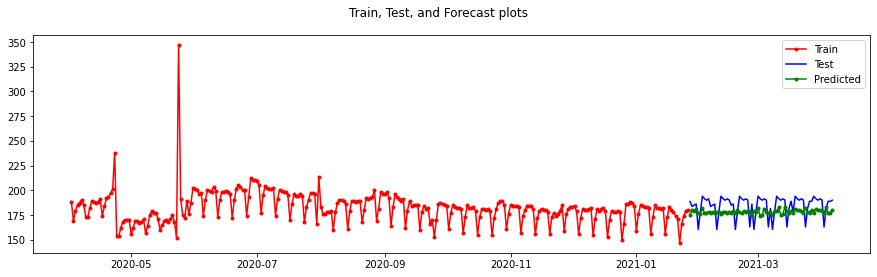

Fitting  NR_MSC_3
Epoch 1/20
10/10 [==============================] - 3s 69ms/step - loss: 2762.4163
Epoch 2/20
10/10 [==============================] - 1s 71ms/step - loss: 1614.3674
Epoch 3/20
10/10 [==============================] - 1s 72ms/step - loss: 972.0626
Epoch 4/20
10/10 [==============================] - 1s 71ms/step - loss: 893.6909
Epoch 5/20
10/10 [==============================] - 1s 70ms/step - loss: 911.9779
Epoch 6/20
10/10 [==============================] - 1s 69ms/step - loss: 891.2816
Epoch 7/20
10/10 [==============================] - 1s 71ms/step - loss: 881.8196
Epoch 8/20
10/10 [==============================] - 1s 71ms/step - loss: 911.1927
Epoch 9/20
10/10 [==============================] - 1s 72ms/step - loss: 919.0620
Epoch 10/20
10/10 [==============================] - 1s 70ms/step - loss: 887.7749
Epoch 11/20
10/10 [==============================] - 1s 69ms/step - loss: 870.5491
Epoch 12/20
10/10 [==============================] - 1s 69ms/step - loss: 89

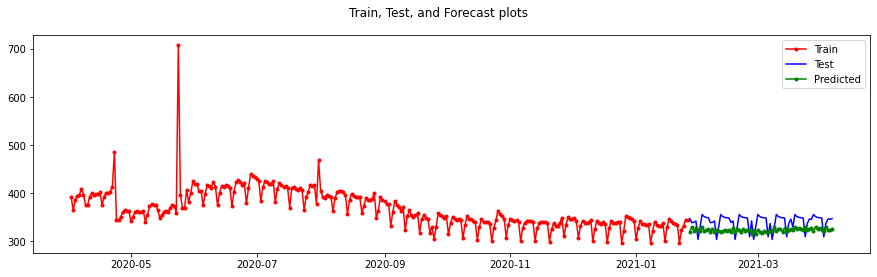

Fitting  NR_MSC_4
Epoch 1/20
10/10 [==============================] - 3s 70ms/step - loss: 5332.2798
Epoch 2/20
10/10 [==============================] - 1s 69ms/step - loss: 3262.6853
Epoch 3/20
10/10 [==============================] - 1s 69ms/step - loss: 3577.5161
Epoch 4/20
10/10 [==============================] - 1s 66ms/step - loss: 2458.3501
Epoch 5/20
10/10 [==============================] - 1s 69ms/step - loss: 2164.7017
Epoch 6/20
10/10 [==============================] - 1s 70ms/step - loss: 2265.9885
Epoch 7/20
10/10 [==============================] - 1s 70ms/step - loss: 2092.0505
Epoch 8/20
10/10 [==============================] - 1s 68ms/step - loss: 2075.8000
Epoch 9/20
10/10 [==============================] - 1s 71ms/step - loss: 2071.3972
Epoch 10/20
10/10 [==============================] - 1s 71ms/step - loss: 2099.1431
Epoch 11/20
10/10 [==============================] - 1s 71ms/step - loss: 2097.4497
Epoch 12/20
10/10 [==============================] - 1s 73ms/step -

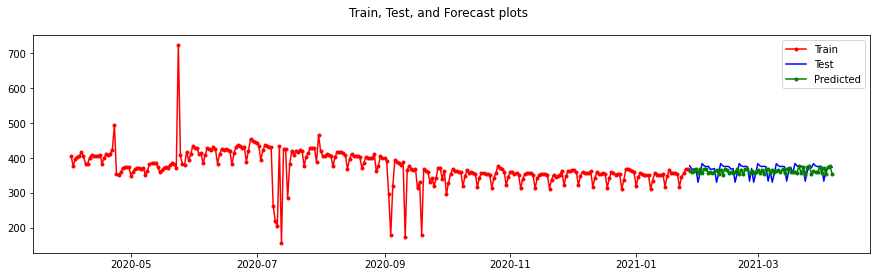

Fitting  NR_MSC_5
Epoch 1/20
10/10 [==============================] - 3s 70ms/step - loss: 2508.9873
Epoch 2/20
10/10 [==============================] - 1s 69ms/step - loss: 1184.9419
Epoch 3/20
10/10 [==============================] - 1s 69ms/step - loss: 1093.7625
Epoch 4/20
10/10 [==============================] - 1s 70ms/step - loss: 937.0377
Epoch 5/20
10/10 [==============================] - 1s 72ms/step - loss: 925.7511
Epoch 6/20
10/10 [==============================] - 1s 73ms/step - loss: 892.6983
Epoch 7/20
10/10 [==============================] - 1s 73ms/step - loss: 892.3408
Epoch 8/20
10/10 [==============================] - 1s 73ms/step - loss: 878.7003
Epoch 9/20
10/10 [==============================] - 1s 73ms/step - loss: 903.1408
Epoch 10/20
10/10 [==============================] - 1s 72ms/step - loss: 896.4146
Epoch 11/20
10/10 [==============================] - 1s 70ms/step - loss: 888.6093
Epoch 12/20
10/10 [==============================] - 1s 74ms/step - loss: 8

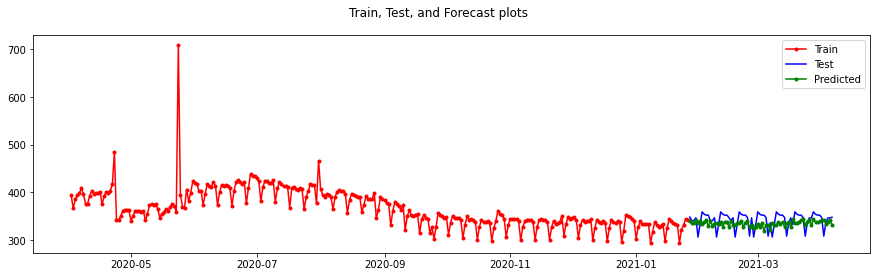

Fitting  NR_MSC_6
Epoch 1/20
10/10 [==============================] - 3s 70ms/step - loss: 950.0311
Epoch 2/20
10/10 [==============================] - 1s 69ms/step - loss: 458.3009
Epoch 3/20
10/10 [==============================] - 1s 73ms/step - loss: 366.3711
Epoch 4/20
10/10 [==============================] - 1s 73ms/step - loss: 343.9284
Epoch 5/20
10/10 [==============================] - 1s 71ms/step - loss: 329.0282
Epoch 6/20
10/10 [==============================] - 1s 76ms/step - loss: 333.3139
Epoch 7/20
10/10 [==============================] - 1s 73ms/step - loss: 321.6091
Epoch 8/20
10/10 [==============================] - 1s 73ms/step - loss: 315.1366
Epoch 9/20
10/10 [==============================] - 1s 73ms/step - loss: 668.5408
Epoch 10/20
10/10 [==============================] - 1s 71ms/step - loss: 3351.3843
Epoch 11/20
10/10 [==============================] - 1s 72ms/step - loss: 975.0327
Epoch 12/20
10/10 [==============================] - 1s 74ms/step - loss: 524

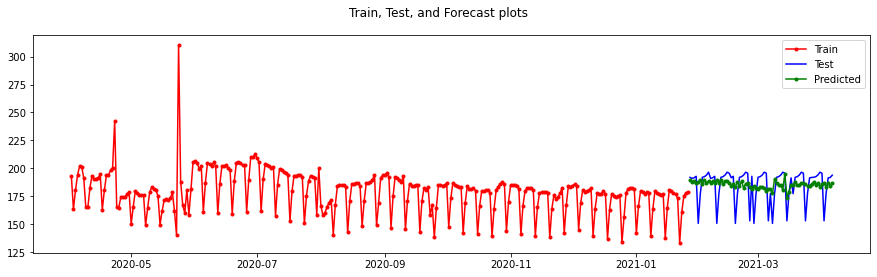

Fitting  NR_MSC_7
Epoch 1/20
10/10 [==============================] - 3s 75ms/step - loss: 617.9838
Epoch 2/20
10/10 [==============================] - 1s 75ms/step - loss: 396.8036
Epoch 3/20
10/10 [==============================] - 1s 74ms/step - loss: 342.2482
Epoch 4/20
10/10 [==============================] - 1s 72ms/step - loss: 329.8276
Epoch 5/20
10/10 [==============================] - 1s 74ms/step - loss: 322.3251
Epoch 6/20
10/10 [==============================] - 1s 69ms/step - loss: 322.6190
Epoch 7/20
10/10 [==============================] - 1s 71ms/step - loss: 334.9867
Epoch 8/20
10/10 [==============================] - 1s 71ms/step - loss: 331.7101
Epoch 9/20
10/10 [==============================] - 1s 70ms/step - loss: 333.1576
Epoch 10/20
10/10 [==============================] - 1s 71ms/step - loss: 312.5589
Epoch 11/20
10/10 [==============================] - 1s 72ms/step - loss: 315.4336
Epoch 12/20
10/10 [==============================] - 1s 74ms/step - loss: 306.

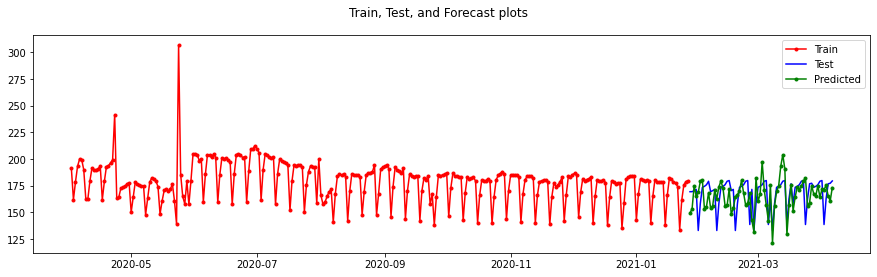

Fitting  NR_MSC_8
Epoch 1/20
10/10 [==============================] - 3s 75ms/step - loss: 834.0042
Epoch 2/20
10/10 [==============================] - 1s 73ms/step - loss: 470.7214
Epoch 3/20
10/10 [==============================] - 1s 72ms/step - loss: 331.9873
Epoch 4/20
10/10 [==============================] - 1s 71ms/step - loss: 311.3059
Epoch 5/20
10/10 [==============================] - 1s 75ms/step - loss: 301.0391
Epoch 6/20
10/10 [==============================] - 1s 72ms/step - loss: 308.6557
Epoch 7/20
10/10 [==============================] - 1s 70ms/step - loss: 303.6786
Epoch 8/20
10/10 [==============================] - 1s 75ms/step - loss: 290.0970
Epoch 9/20
10/10 [==============================] - 1s 76ms/step - loss: 289.7858
Epoch 10/20
10/10 [==============================] - 1s 74ms/step - loss: 294.7043
Epoch 11/20
10/10 [==============================] - 1s 72ms/step - loss: 283.1164
Epoch 12/20
10/10 [==============================] - 1s 74ms/step - loss: 280.

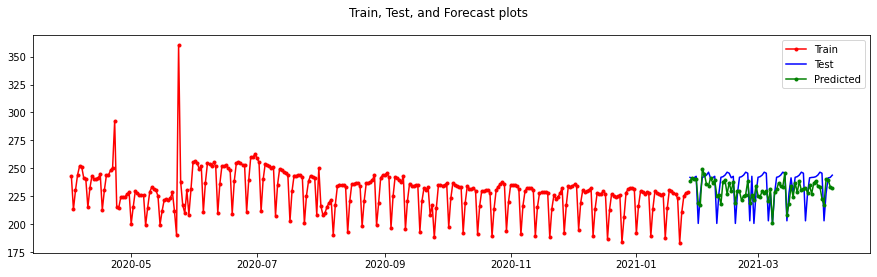

Fitting  NR_MSC_9
Epoch 1/20
10/10 [==============================] - 3s 74ms/step - loss: 943.1782
Epoch 2/20
10/10 [==============================] - 1s 75ms/step - loss: 658.3466
Epoch 3/20
10/10 [==============================] - 1s 75ms/step - loss: 609.8324
Epoch 4/20
10/10 [==============================] - 1s 74ms/step - loss: 609.7355
Epoch 5/20
10/10 [==============================] - 1s 74ms/step - loss: 590.0085
Epoch 6/20
10/10 [==============================] - 1s 82ms/step - loss: 613.3840
Epoch 7/20
10/10 [==============================] - 1s 75ms/step - loss: 615.1583
Epoch 8/20
10/10 [==============================] - 1s 74ms/step - loss: 589.9799
Epoch 9/20
10/10 [==============================] - 1s 73ms/step - loss: 609.7213
Epoch 10/20
10/10 [==============================] - 1s 78ms/step - loss: 585.5020
Epoch 11/20
10/10 [==============================] - 1s 72ms/step - loss: 603.0149
Epoch 12/20
10/10 [==============================] - 1s 72ms/step - loss: 573.

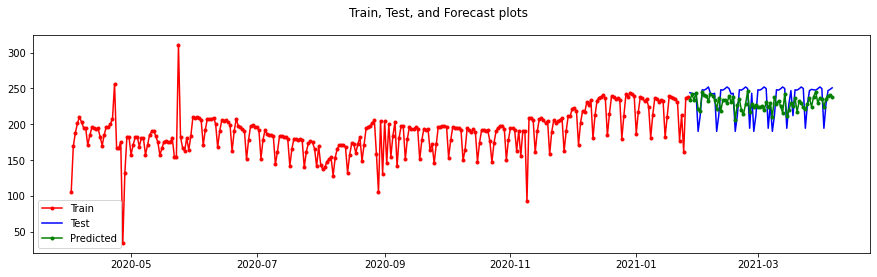

Fitting  NR_MSC_10
Epoch 1/20
10/10 [==============================] - 3s 73ms/step - loss: 845.9586
Epoch 2/20
10/10 [==============================] - 1s 73ms/step - loss: 764.1296
Epoch 3/20
10/10 [==============================] - 1s 73ms/step - loss: 698.1541
Epoch 4/20
10/10 [==============================] - 1s 73ms/step - loss: 1395.1062
Epoch 5/20
10/10 [==============================] - 1s 71ms/step - loss: 715.7445
Epoch 6/20
10/10 [==============================] - 1s 72ms/step - loss: 698.8971
Epoch 7/20
10/10 [==============================] - 1s 77ms/step - loss: 697.6957
Epoch 8/20
10/10 [==============================] - 1s 76ms/step - loss: 677.2638
Epoch 9/20
10/10 [==============================] - 1s 74ms/step - loss: 671.9810
Epoch 10/20
10/10 [==============================] - 1s 74ms/step - loss: 657.0817
Epoch 11/20
10/10 [==============================] - 1s 72ms/step - loss: 699.6430
Epoch 12/20
10/10 [==============================] - 1s 72ms/step - loss: 79

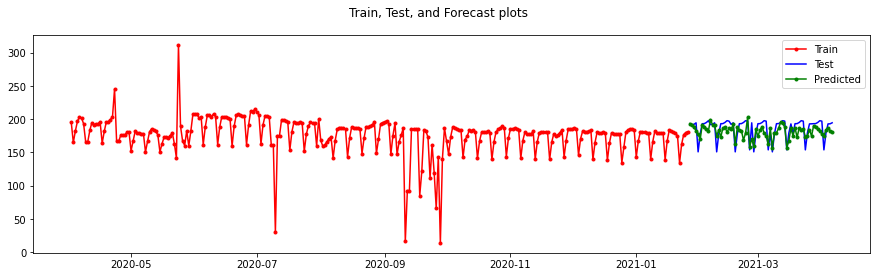

In [ ]:
f15d, f1m, f3m = models(data, 300)

## Three months Forecaset

In [ ]:
f15d.head()

NR_MSC_1    NR_MSC_2  ...    NR_MSC_9   NR_MSC_10
Date                                ...                        
2021-04-07  171.984299  166.763107  ...  192.200104  137.209076
2021-04-08  171.981506  166.755630  ...  192.330414  137.082016
2021-04-09  171.983444  166.748596  ...  192.646576  137.012863
2021-04-10  171.989136  166.742050  ...  193.034302  136.899750
2021-04-11  171.996048  166.736008  ...  193.300980  136.766602

[5 rows x 10 columns]

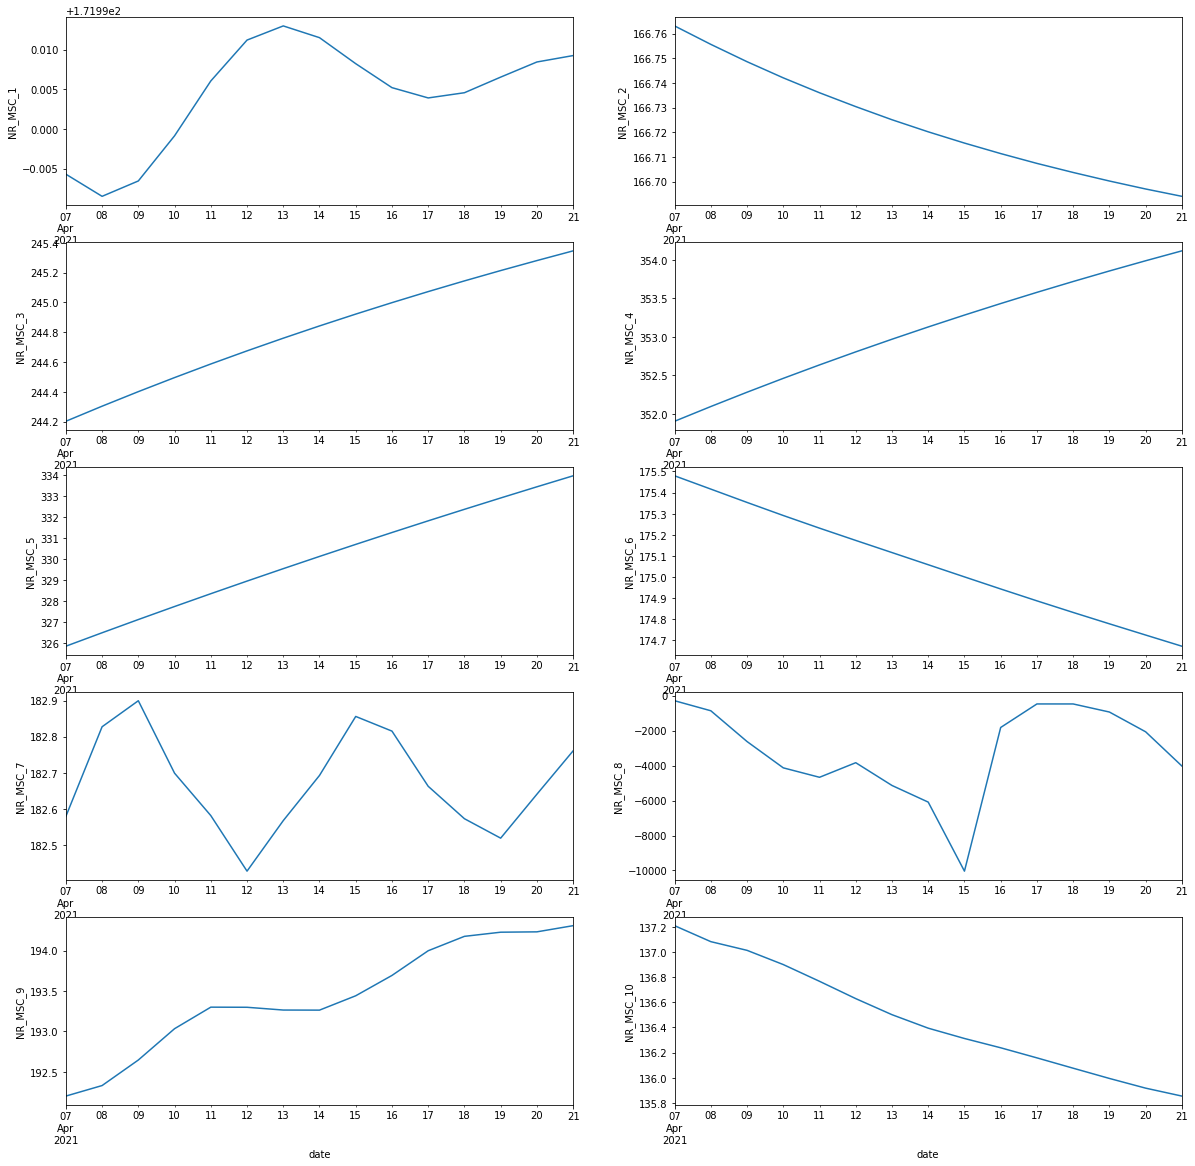

In [ ]:
plot_forecasts(f15d)

## Six months forecast

In [ ]:
f1m.head()

NR_MSC_1    NR_MSC_2  ...    NR_MSC_9   NR_MSC_10
Date                                ...                        
2021-04-07  171.984299  166.763107  ...  192.200104  137.209076
2021-04-08  171.981506  166.755630  ...  192.330414  137.082016
2021-04-09  171.983444  166.748596  ...  192.646576  137.012863
2021-04-10  171.989136  166.742050  ...  193.034302  136.899750
2021-04-11  171.996048  166.736008  ...  193.300980  136.766602

[5 rows x 10 columns]

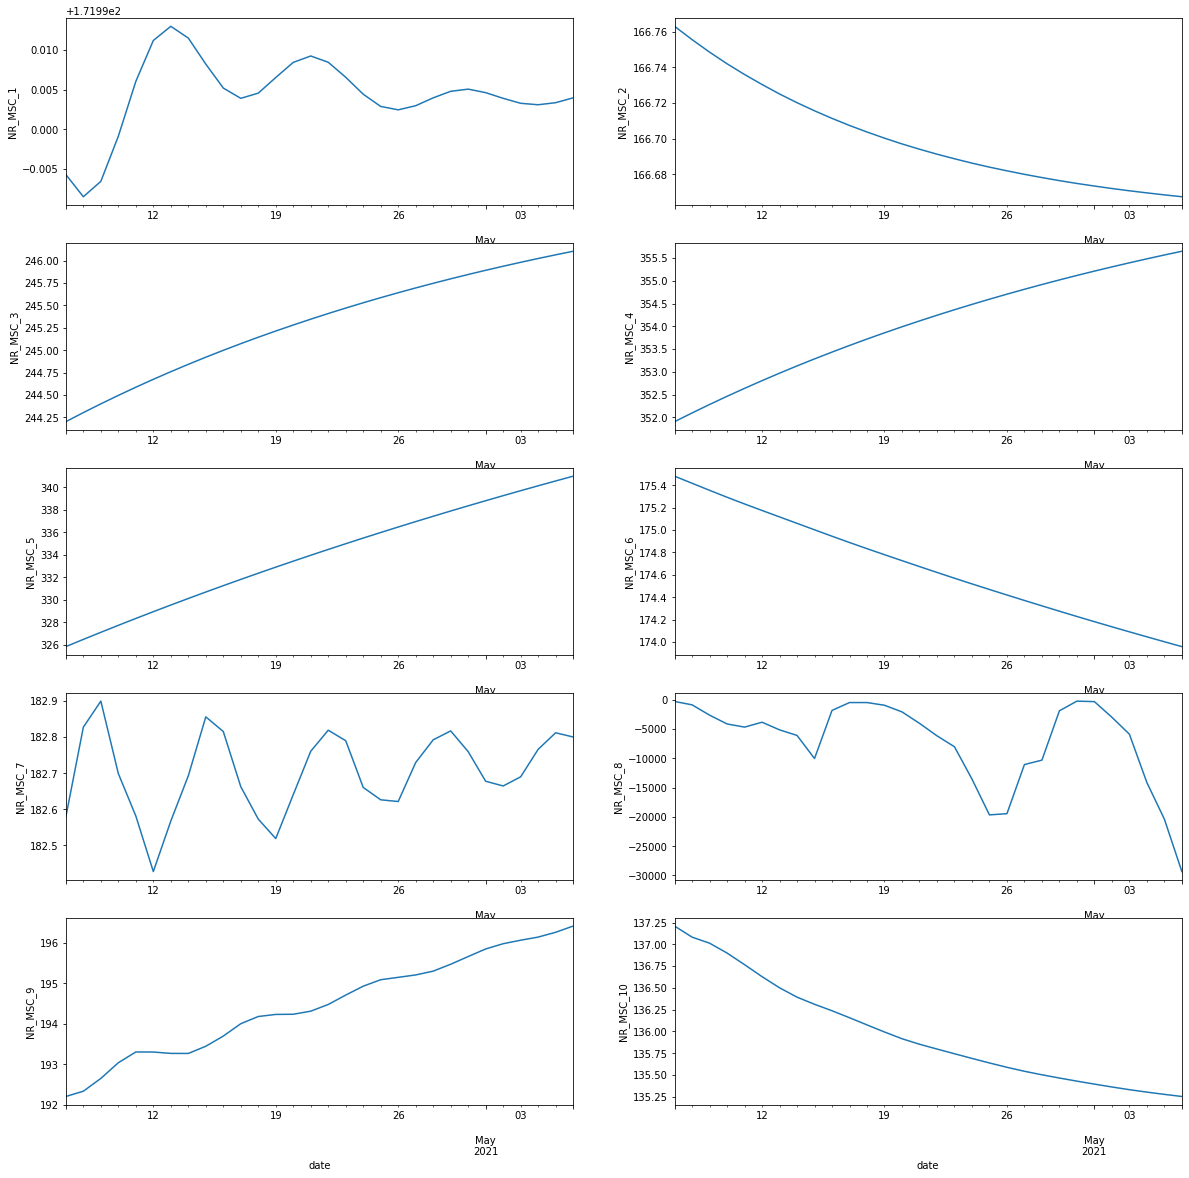

In [ ]:
plot_forecasts(f1m)

# One year forecast

In [ ]:
f3m.head()

NR_MSC_1    NR_MSC_2  ...    NR_MSC_9   NR_MSC_10
Date                                ...                        
2021-04-07  171.984299  166.763107  ...  192.200104  137.209076
2021-04-08  171.981506  166.755630  ...  192.330414  137.082016
2021-04-09  171.983444  166.748596  ...  192.646576  137.012863
2021-04-10  171.989136  166.742050  ...  193.034302  136.899750
2021-04-11  171.996048  166.736008  ...  193.300980  136.766602

[5 rows x 10 columns]

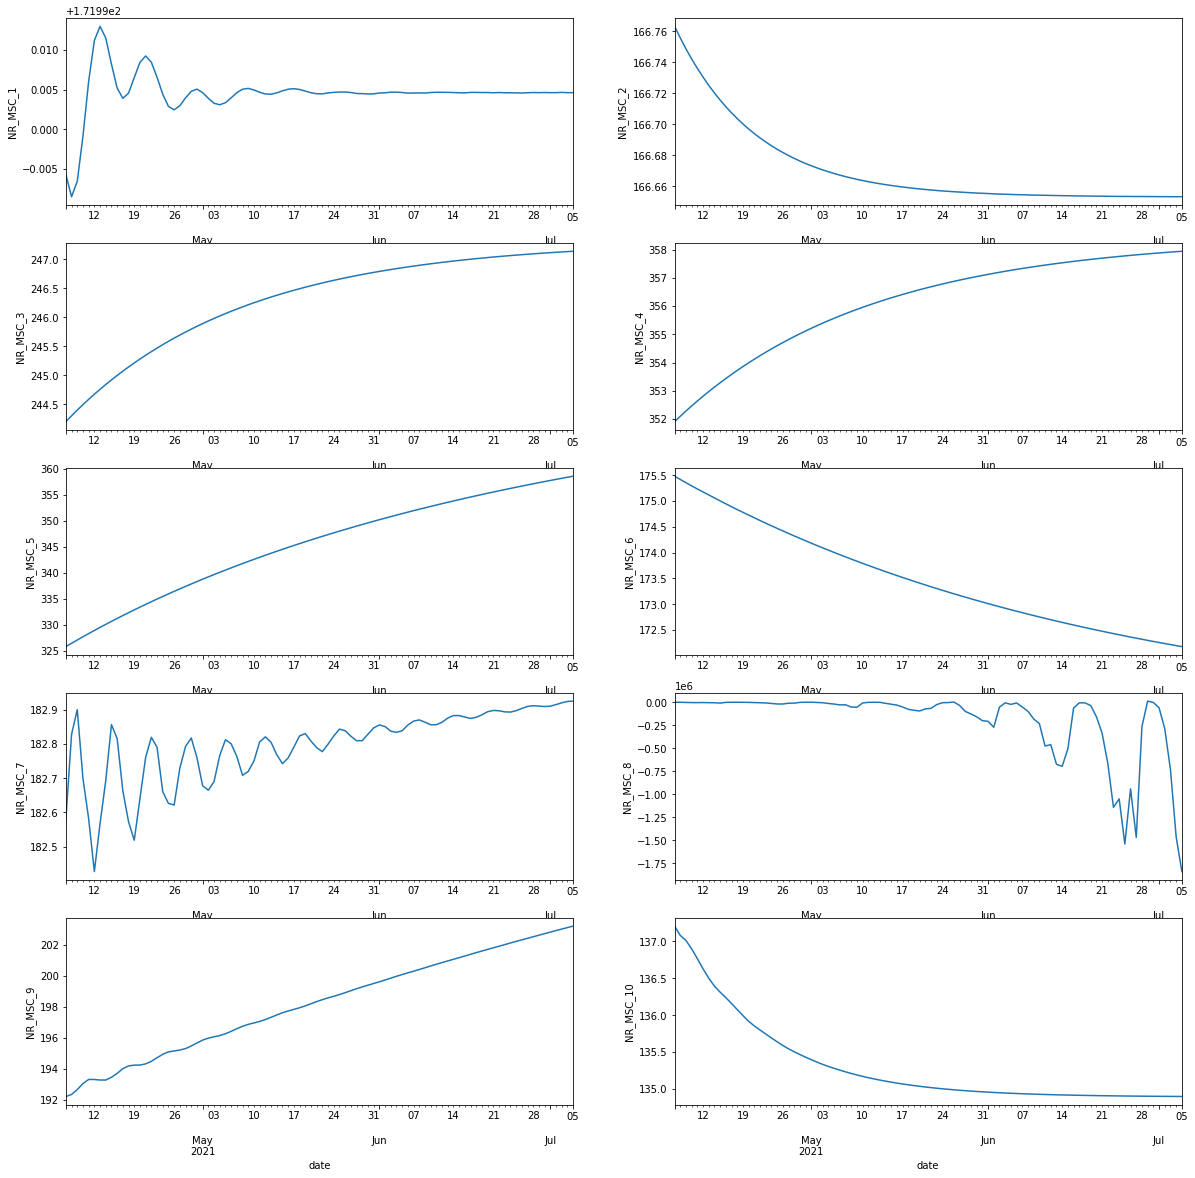

In [ ]:
plot_forecasts(f3m)